In [1]:
import os
import numpy as np
from sklearn.cluster import KMeans, MiniBatchKMeans

from multiprocessing import cpu_count
from concurrent.futures import ProcessPoolExecutor, as_completed

In [2]:
def scan_files(directory, prefix=None, postfix=None):
    files_list = []
    for root, sub_dirs, files in os.walk(directory):
        for special_file in files:
            if postfix:
                if special_file.endswith(postfix):
                    files_list.append(os.path.join(root, special_file))
            elif prefix:
                if special_file.startswith(prefix):
                    files_list.append(os.path.join(root, special_file))
            else:
                files_list.append(os.path.join(root, special_file))
    return files_list

def collect_sizes(txt_fname, size):
    sizes = []
    with open(txt_fname, 'r') as f:
        for line in f.readlines():
            tokens = line.strip().split()
            sizes.append([int(float(tokens[3])*size), int(float(tokens[4])*size)])
    return sizes

def batch_collect_sizes(txt_fnames, size):
    sizes = []
    for txt_fname in txt_fnames:
        sizes += collect_sizes(txt_fname, size)
    return sizes

def worker_single(data_path, size=608):
    txt_fnames = scan_files(data_path, postfix=".txt")
    sizes = []
    for i,txt_fname in enumerate(txt_fnames):
        if i % 10000 == 0:
            print(i)
        sizes += collect_sizes(txt_fname, size)
    return sizes

def get_file(data_path):
    if os.path.isdir(data_path):
        files = scan_files(data_path, postfix=".txt")
    else:
        files = []
        with open(data_path, 'r') as f:
            for line in f.readlines():
                files.append(os.path.splitext(line.strip())[0] + ".txt")
    return files

def worker_multip(data_path, size=608):
    files = get_file(data_path)
    print("# files:", len(files))

    executor = ProcessPoolExecutor(max_workers=8)
    tasks = []

    batch_size = 10000
    for i in range(0, len(files), batch_size):
        batch = files[i : i+batch_size]
        tasks.append(executor.submit(batch_collect_sizes, batch, size))
    
    sizes = []
    job_count = len(tasks)
    for future in as_completed(tasks):
        result = future.result()  # get the returning result from calling fuction
        sizes += result
        job_count -= 1
        print("One Job Done, Remaining Job Count: %s, Files collected: %d" % (job_count, len(sizes)))
        
    return sizes

In [3]:
data_path = "/home/ssd_array0/Data/batch6.4_1216/train-gnet1.txt"
sizes = worker_multip(data_path)

print("# files", len(sizes))

# files: 6199024
One Job Done, Remaining Job Count: 6199, Files collected: 2045
One Job Done, Remaining Job Count: 6198, Files collected: 4395
One Job Done, Remaining Job Count: 6197, Files collected: 6629
One Job Done, Remaining Job Count: 6196, Files collected: 8793
One Job Done, Remaining Job Count: 6195, Files collected: 10977
One Job Done, Remaining Job Count: 6194, Files collected: 13148
One Job Done, Remaining Job Count: 6193, Files collected: 15389
One Job Done, Remaining Job Count: 6192, Files collected: 17668
One Job Done, Remaining Job Count: 6191, Files collected: 19774
One Job Done, Remaining Job Count: 6190, Files collected: 21968
One Job Done, Remaining Job Count: 6189, Files collected: 24172
One Job Done, Remaining Job Count: 6188, Files collected: 26262
One Job Done, Remaining Job Count: 6187, Files collected: 28590
One Job Done, Remaining Job Count: 6186, Files collected: 30893
One Job Done, Remaining Job Count: 6185, Files collected: 33195
One Job Done, Remaining Job

One Job Done, Remaining Job Count: 6066, Files collected: 298599
One Job Done, Remaining Job Count: 6065, Files collected: 300846
One Job Done, Remaining Job Count: 6064, Files collected: 302989
One Job Done, Remaining Job Count: 6063, Files collected: 305249
One Job Done, Remaining Job Count: 6062, Files collected: 307387
One Job Done, Remaining Job Count: 6061, Files collected: 309490
One Job Done, Remaining Job Count: 6060, Files collected: 311725
One Job Done, Remaining Job Count: 6059, Files collected: 313902
One Job Done, Remaining Job Count: 6058, Files collected: 316132
One Job Done, Remaining Job Count: 6057, Files collected: 318434
One Job Done, Remaining Job Count: 6056, Files collected: 320494
One Job Done, Remaining Job Count: 6055, Files collected: 322787
One Job Done, Remaining Job Count: 6054, Files collected: 325226
One Job Done, Remaining Job Count: 6053, Files collected: 327520
One Job Done, Remaining Job Count: 6052, Files collected: 329792
One Job Done, Remaining J

One Job Done, Remaining Job Count: 5935, Files collected: 591409
One Job Done, Remaining Job Count: 5934, Files collected: 593526
One Job Done, Remaining Job Count: 5933, Files collected: 595822
One Job Done, Remaining Job Count: 5932, Files collected: 598150
One Job Done, Remaining Job Count: 5931, Files collected: 600389
One Job Done, Remaining Job Count: 5930, Files collected: 602569
One Job Done, Remaining Job Count: 5929, Files collected: 604721
One Job Done, Remaining Job Count: 5928, Files collected: 606928
One Job Done, Remaining Job Count: 5927, Files collected: 609182
One Job Done, Remaining Job Count: 5926, Files collected: 611469
One Job Done, Remaining Job Count: 5925, Files collected: 613802
One Job Done, Remaining Job Count: 5924, Files collected: 616056
One Job Done, Remaining Job Count: 5923, Files collected: 618294
One Job Done, Remaining Job Count: 5922, Files collected: 620609
One Job Done, Remaining Job Count: 5921, Files collected: 622982
One Job Done, Remaining J

One Job Done, Remaining Job Count: 5804, Files collected: 882765
One Job Done, Remaining Job Count: 5803, Files collected: 884891
One Job Done, Remaining Job Count: 5802, Files collected: 887196
One Job Done, Remaining Job Count: 5801, Files collected: 889569
One Job Done, Remaining Job Count: 5800, Files collected: 891639
One Job Done, Remaining Job Count: 5799, Files collected: 893849
One Job Done, Remaining Job Count: 5798, Files collected: 896050
One Job Done, Remaining Job Count: 5797, Files collected: 898311
One Job Done, Remaining Job Count: 5796, Files collected: 900495
One Job Done, Remaining Job Count: 5795, Files collected: 902664
One Job Done, Remaining Job Count: 5794, Files collected: 904724
One Job Done, Remaining Job Count: 5793, Files collected: 906947
One Job Done, Remaining Job Count: 5792, Files collected: 909029
One Job Done, Remaining Job Count: 5791, Files collected: 911260
One Job Done, Remaining Job Count: 5790, Files collected: 913660
One Job Done, Remaining J

One Job Done, Remaining Job Count: 5677, Files collected: 1163011
One Job Done, Remaining Job Count: 5676, Files collected: 1165423
One Job Done, Remaining Job Count: 5675, Files collected: 1167444
One Job Done, Remaining Job Count: 5674, Files collected: 1169655
One Job Done, Remaining Job Count: 5673, Files collected: 1171975
One Job Done, Remaining Job Count: 5672, Files collected: 1174111
One Job Done, Remaining Job Count: 5671, Files collected: 1176296
One Job Done, Remaining Job Count: 5670, Files collected: 1178607
One Job Done, Remaining Job Count: 5669, Files collected: 1180809
One Job Done, Remaining Job Count: 5668, Files collected: 1182922
One Job Done, Remaining Job Count: 5667, Files collected: 1185079
One Job Done, Remaining Job Count: 5666, Files collected: 1187492
One Job Done, Remaining Job Count: 5665, Files collected: 1189764
One Job Done, Remaining Job Count: 5664, Files collected: 1191935
One Job Done, Remaining Job Count: 5663, Files collected: 1194177
One Job Do

One Job Done, Remaining Job Count: 5552, Files collected: 1440042
One Job Done, Remaining Job Count: 5551, Files collected: 1442194
One Job Done, Remaining Job Count: 5550, Files collected: 1444507
One Job Done, Remaining Job Count: 5549, Files collected: 1446789
One Job Done, Remaining Job Count: 5548, Files collected: 1449088
One Job Done, Remaining Job Count: 5547, Files collected: 1451420
One Job Done, Remaining Job Count: 5546, Files collected: 1453536
One Job Done, Remaining Job Count: 5545, Files collected: 1455698
One Job Done, Remaining Job Count: 5544, Files collected: 1457907
One Job Done, Remaining Job Count: 5543, Files collected: 1460074
One Job Done, Remaining Job Count: 5542, Files collected: 1462261
One Job Done, Remaining Job Count: 5541, Files collected: 1464474
One Job Done, Remaining Job Count: 5540, Files collected: 1466540
One Job Done, Remaining Job Count: 5539, Files collected: 1468668
One Job Done, Remaining Job Count: 5538, Files collected: 1470917
One Job Do

One Job Done, Remaining Job Count: 5427, Files collected: 1718530
One Job Done, Remaining Job Count: 5426, Files collected: 1720747
One Job Done, Remaining Job Count: 5425, Files collected: 1722949
One Job Done, Remaining Job Count: 5424, Files collected: 1725130
One Job Done, Remaining Job Count: 5423, Files collected: 1727226
One Job Done, Remaining Job Count: 5422, Files collected: 1729468
One Job Done, Remaining Job Count: 5421, Files collected: 1731647
One Job Done, Remaining Job Count: 5420, Files collected: 1733913
One Job Done, Remaining Job Count: 5419, Files collected: 1736068
One Job Done, Remaining Job Count: 5418, Files collected: 1738331
One Job Done, Remaining Job Count: 5417, Files collected: 1740667
One Job Done, Remaining Job Count: 5416, Files collected: 1742847
One Job Done, Remaining Job Count: 5415, Files collected: 1745079
One Job Done, Remaining Job Count: 5414, Files collected: 1747322
One Job Done, Remaining Job Count: 5413, Files collected: 1749504
One Job Do

One Job Done, Remaining Job Count: 5298, Files collected: 2004867
One Job Done, Remaining Job Count: 5297, Files collected: 2007095
One Job Done, Remaining Job Count: 5296, Files collected: 2009385
One Job Done, Remaining Job Count: 5295, Files collected: 2011659
One Job Done, Remaining Job Count: 5294, Files collected: 2013720
One Job Done, Remaining Job Count: 5293, Files collected: 2015904
One Job Done, Remaining Job Count: 5292, Files collected: 2018154
One Job Done, Remaining Job Count: 5291, Files collected: 2020264
One Job Done, Remaining Job Count: 5290, Files collected: 2022429
One Job Done, Remaining Job Count: 5289, Files collected: 2024551
One Job Done, Remaining Job Count: 5288, Files collected: 2026693
One Job Done, Remaining Job Count: 5287, Files collected: 2028965
One Job Done, Remaining Job Count: 5286, Files collected: 2031104
One Job Done, Remaining Job Count: 5285, Files collected: 2033314
One Job Done, Remaining Job Count: 5284, Files collected: 2035521
One Job Do

One Job Done, Remaining Job Count: 5170, Files collected: 2289112
One Job Done, Remaining Job Count: 5169, Files collected: 2291225
One Job Done, Remaining Job Count: 5168, Files collected: 2293305
One Job Done, Remaining Job Count: 5167, Files collected: 2295511
One Job Done, Remaining Job Count: 5166, Files collected: 2297694
One Job Done, Remaining Job Count: 5165, Files collected: 2299975
One Job Done, Remaining Job Count: 5164, Files collected: 2302313
One Job Done, Remaining Job Count: 5163, Files collected: 2304546
One Job Done, Remaining Job Count: 5162, Files collected: 2306782
One Job Done, Remaining Job Count: 5161, Files collected: 2308979
One Job Done, Remaining Job Count: 5160, Files collected: 2311254
One Job Done, Remaining Job Count: 5159, Files collected: 2313381
One Job Done, Remaining Job Count: 5158, Files collected: 2315624
One Job Done, Remaining Job Count: 5157, Files collected: 2317834
One Job Done, Remaining Job Count: 5156, Files collected: 2319976
One Job Do

One Job Done, Remaining Job Count: 5040, Files collected: 2578884
One Job Done, Remaining Job Count: 5039, Files collected: 2581184
One Job Done, Remaining Job Count: 5038, Files collected: 2583345
One Job Done, Remaining Job Count: 5037, Files collected: 2585623
One Job Done, Remaining Job Count: 5036, Files collected: 2587897
One Job Done, Remaining Job Count: 5035, Files collected: 2590341
One Job Done, Remaining Job Count: 5034, Files collected: 2592601
One Job Done, Remaining Job Count: 5033, Files collected: 2594814
One Job Done, Remaining Job Count: 5032, Files collected: 2596968
One Job Done, Remaining Job Count: 5031, Files collected: 2599249
One Job Done, Remaining Job Count: 5030, Files collected: 2601526
One Job Done, Remaining Job Count: 5029, Files collected: 2603663
One Job Done, Remaining Job Count: 5028, Files collected: 2605973
One Job Done, Remaining Job Count: 5027, Files collected: 2608286
One Job Done, Remaining Job Count: 5026, Files collected: 2610631
One Job Do

One Job Done, Remaining Job Count: 4914, Files collected: 2859007
One Job Done, Remaining Job Count: 4913, Files collected: 2861150
One Job Done, Remaining Job Count: 4912, Files collected: 2863311
One Job Done, Remaining Job Count: 4911, Files collected: 2865548
One Job Done, Remaining Job Count: 4910, Files collected: 2867750
One Job Done, Remaining Job Count: 4909, Files collected: 2869948
One Job Done, Remaining Job Count: 4908, Files collected: 2872258
One Job Done, Remaining Job Count: 4907, Files collected: 2874564
One Job Done, Remaining Job Count: 4906, Files collected: 2876855
One Job Done, Remaining Job Count: 4905, Files collected: 2879148
One Job Done, Remaining Job Count: 4904, Files collected: 2881431
One Job Done, Remaining Job Count: 4903, Files collected: 2883583
One Job Done, Remaining Job Count: 4902, Files collected: 2885991
One Job Done, Remaining Job Count: 4901, Files collected: 2888340
One Job Done, Remaining Job Count: 4900, Files collected: 2890659
One Job Do

One Job Done, Remaining Job Count: 4785, Files collected: 3147538
One Job Done, Remaining Job Count: 4784, Files collected: 3149765
One Job Done, Remaining Job Count: 4783, Files collected: 3151965
One Job Done, Remaining Job Count: 4782, Files collected: 3154254
One Job Done, Remaining Job Count: 4781, Files collected: 3156372
One Job Done, Remaining Job Count: 4780, Files collected: 3158632
One Job Done, Remaining Job Count: 4779, Files collected: 3161024
One Job Done, Remaining Job Count: 4778, Files collected: 3163280
One Job Done, Remaining Job Count: 4777, Files collected: 3165499
One Job Done, Remaining Job Count: 4776, Files collected: 3167718
One Job Done, Remaining Job Count: 4775, Files collected: 3169774
One Job Done, Remaining Job Count: 4774, Files collected: 3172106
One Job Done, Remaining Job Count: 4773, Files collected: 3174282
One Job Done, Remaining Job Count: 4772, Files collected: 3176532
One Job Done, Remaining Job Count: 4771, Files collected: 3178874
One Job Do

One Job Done, Remaining Job Count: 4658, Files collected: 3430268
One Job Done, Remaining Job Count: 4657, Files collected: 3432468
One Job Done, Remaining Job Count: 4656, Files collected: 3434644
One Job Done, Remaining Job Count: 4655, Files collected: 3436764
One Job Done, Remaining Job Count: 4654, Files collected: 3438995
One Job Done, Remaining Job Count: 4653, Files collected: 3441210
One Job Done, Remaining Job Count: 4652, Files collected: 3443351
One Job Done, Remaining Job Count: 4651, Files collected: 3445581
One Job Done, Remaining Job Count: 4650, Files collected: 3447792
One Job Done, Remaining Job Count: 4649, Files collected: 3449916
One Job Done, Remaining Job Count: 4648, Files collected: 3452097
One Job Done, Remaining Job Count: 4647, Files collected: 3454338
One Job Done, Remaining Job Count: 4646, Files collected: 3456439
One Job Done, Remaining Job Count: 4645, Files collected: 3458642
One Job Done, Remaining Job Count: 4644, Files collected: 3460874
One Job Do

One Job Done, Remaining Job Count: 4526, Files collected: 3723682
One Job Done, Remaining Job Count: 4525, Files collected: 3725961
One Job Done, Remaining Job Count: 4524, Files collected: 3728153
One Job Done, Remaining Job Count: 4523, Files collected: 3730360
One Job Done, Remaining Job Count: 4522, Files collected: 3732477
One Job Done, Remaining Job Count: 4521, Files collected: 3734616
One Job Done, Remaining Job Count: 4520, Files collected: 3736761
One Job Done, Remaining Job Count: 4519, Files collected: 3738979
One Job Done, Remaining Job Count: 4518, Files collected: 3741344
One Job Done, Remaining Job Count: 4517, Files collected: 3743618
One Job Done, Remaining Job Count: 4516, Files collected: 3745914
One Job Done, Remaining Job Count: 4515, Files collected: 3748264
One Job Done, Remaining Job Count: 4514, Files collected: 3750502
One Job Done, Remaining Job Count: 4513, Files collected: 3752544
One Job Done, Remaining Job Count: 4512, Files collected: 3754720
One Job Do

One Job Done, Remaining Job Count: 4394, Files collected: 4017934
One Job Done, Remaining Job Count: 4393, Files collected: 4020441
One Job Done, Remaining Job Count: 4392, Files collected: 4022602
One Job Done, Remaining Job Count: 4391, Files collected: 4024800
One Job Done, Remaining Job Count: 4390, Files collected: 4026927
One Job Done, Remaining Job Count: 4389, Files collected: 4029204
One Job Done, Remaining Job Count: 4388, Files collected: 4031383
One Job Done, Remaining Job Count: 4387, Files collected: 4033579
One Job Done, Remaining Job Count: 4386, Files collected: 4035764
One Job Done, Remaining Job Count: 4385, Files collected: 4037908
One Job Done, Remaining Job Count: 4384, Files collected: 4039941
One Job Done, Remaining Job Count: 4383, Files collected: 4042217
One Job Done, Remaining Job Count: 4382, Files collected: 4044396
One Job Done, Remaining Job Count: 4381, Files collected: 4046586
One Job Done, Remaining Job Count: 4380, Files collected: 4048828
One Job Do

One Job Done, Remaining Job Count: 4263, Files collected: 4309253
One Job Done, Remaining Job Count: 4262, Files collected: 4311422
One Job Done, Remaining Job Count: 4261, Files collected: 4313605
One Job Done, Remaining Job Count: 4260, Files collected: 4315930
One Job Done, Remaining Job Count: 4259, Files collected: 4318283
One Job Done, Remaining Job Count: 4258, Files collected: 4320565
One Job Done, Remaining Job Count: 4257, Files collected: 4322893
One Job Done, Remaining Job Count: 4256, Files collected: 4324946
One Job Done, Remaining Job Count: 4255, Files collected: 4327212
One Job Done, Remaining Job Count: 4254, Files collected: 4329412
One Job Done, Remaining Job Count: 4253, Files collected: 4331708
One Job Done, Remaining Job Count: 4252, Files collected: 4333875
One Job Done, Remaining Job Count: 4251, Files collected: 4336122
One Job Done, Remaining Job Count: 4250, Files collected: 4338391
One Job Done, Remaining Job Count: 4249, Files collected: 4340620
One Job Do

One Job Done, Remaining Job Count: 4135, Files collected: 4595352
One Job Done, Remaining Job Count: 4134, Files collected: 4597566
One Job Done, Remaining Job Count: 4133, Files collected: 4599763
One Job Done, Remaining Job Count: 4132, Files collected: 4601910
One Job Done, Remaining Job Count: 4131, Files collected: 4604009
One Job Done, Remaining Job Count: 4130, Files collected: 4606313
One Job Done, Remaining Job Count: 4129, Files collected: 4608461
One Job Done, Remaining Job Count: 4128, Files collected: 4610724
One Job Done, Remaining Job Count: 4127, Files collected: 4612862
One Job Done, Remaining Job Count: 4126, Files collected: 4615007
One Job Done, Remaining Job Count: 4125, Files collected: 4617249
One Job Done, Remaining Job Count: 4124, Files collected: 4619491
One Job Done, Remaining Job Count: 4123, Files collected: 4621890
One Job Done, Remaining Job Count: 4122, Files collected: 4624083
One Job Done, Remaining Job Count: 4121, Files collected: 4626195
One Job Do

One Job Done, Remaining Job Count: 4010, Files collected: 4873091
One Job Done, Remaining Job Count: 4009, Files collected: 4875265
One Job Done, Remaining Job Count: 4008, Files collected: 4877646
One Job Done, Remaining Job Count: 4007, Files collected: 4879948
One Job Done, Remaining Job Count: 4006, Files collected: 4882341
One Job Done, Remaining Job Count: 4005, Files collected: 4884694
One Job Done, Remaining Job Count: 4004, Files collected: 4886960
One Job Done, Remaining Job Count: 4003, Files collected: 4889172
One Job Done, Remaining Job Count: 4002, Files collected: 4891400
One Job Done, Remaining Job Count: 4001, Files collected: 4893878
One Job Done, Remaining Job Count: 4000, Files collected: 4896019
One Job Done, Remaining Job Count: 3999, Files collected: 4898332
One Job Done, Remaining Job Count: 3998, Files collected: 4900552
One Job Done, Remaining Job Count: 3997, Files collected: 4902895
One Job Done, Remaining Job Count: 3996, Files collected: 4905102
One Job Do

One Job Done, Remaining Job Count: 3884, Files collected: 5154973
One Job Done, Remaining Job Count: 3883, Files collected: 5157134
One Job Done, Remaining Job Count: 3882, Files collected: 5159484
One Job Done, Remaining Job Count: 3881, Files collected: 5161679
One Job Done, Remaining Job Count: 3880, Files collected: 5164071
One Job Done, Remaining Job Count: 3879, Files collected: 5166238
One Job Done, Remaining Job Count: 3878, Files collected: 5168644
One Job Done, Remaining Job Count: 3877, Files collected: 5170883
One Job Done, Remaining Job Count: 3876, Files collected: 5173160
One Job Done, Remaining Job Count: 3875, Files collected: 5175308
One Job Done, Remaining Job Count: 3874, Files collected: 5177540
One Job Done, Remaining Job Count: 3873, Files collected: 5179753
One Job Done, Remaining Job Count: 3872, Files collected: 5182008
One Job Done, Remaining Job Count: 3871, Files collected: 5184271
One Job Done, Remaining Job Count: 3870, Files collected: 5186416
One Job Do

One Job Done, Remaining Job Count: 3756, Files collected: 5440829
One Job Done, Remaining Job Count: 3755, Files collected: 5443137
One Job Done, Remaining Job Count: 3754, Files collected: 5445294
One Job Done, Remaining Job Count: 3753, Files collected: 5447673
One Job Done, Remaining Job Count: 3752, Files collected: 5449983
One Job Done, Remaining Job Count: 3751, Files collected: 5452283
One Job Done, Remaining Job Count: 3750, Files collected: 5454400
One Job Done, Remaining Job Count: 3749, Files collected: 5456622
One Job Done, Remaining Job Count: 3748, Files collected: 5458889
One Job Done, Remaining Job Count: 3747, Files collected: 5461155
One Job Done, Remaining Job Count: 3746, Files collected: 5463201
One Job Done, Remaining Job Count: 3745, Files collected: 5465301
One Job Done, Remaining Job Count: 3744, Files collected: 5467568
One Job Done, Remaining Job Count: 3743, Files collected: 5469804
One Job Done, Remaining Job Count: 3742, Files collected: 5471997
One Job Do

One Job Done, Remaining Job Count: 3631, Files collected: 5717827
One Job Done, Remaining Job Count: 3630, Files collected: 5720101
One Job Done, Remaining Job Count: 3629, Files collected: 5722231
One Job Done, Remaining Job Count: 3628, Files collected: 5724428
One Job Done, Remaining Job Count: 3627, Files collected: 5726650
One Job Done, Remaining Job Count: 3626, Files collected: 5728907
One Job Done, Remaining Job Count: 3625, Files collected: 5731189
One Job Done, Remaining Job Count: 3624, Files collected: 5733356
One Job Done, Remaining Job Count: 3623, Files collected: 5735536
One Job Done, Remaining Job Count: 3622, Files collected: 5737683
One Job Done, Remaining Job Count: 3621, Files collected: 5739862
One Job Done, Remaining Job Count: 3620, Files collected: 5742079
One Job Done, Remaining Job Count: 3619, Files collected: 5744500
One Job Done, Remaining Job Count: 3618, Files collected: 5746679
One Job Done, Remaining Job Count: 3617, Files collected: 5748867
One Job Do

One Job Done, Remaining Job Count: 3503, Files collected: 6001384
One Job Done, Remaining Job Count: 3502, Files collected: 6003664
One Job Done, Remaining Job Count: 3501, Files collected: 6005869
One Job Done, Remaining Job Count: 3500, Files collected: 6008141
One Job Done, Remaining Job Count: 3499, Files collected: 6010441
One Job Done, Remaining Job Count: 3498, Files collected: 6012552
One Job Done, Remaining Job Count: 3497, Files collected: 6014799
One Job Done, Remaining Job Count: 3496, Files collected: 6016964
One Job Done, Remaining Job Count: 3495, Files collected: 6019132
One Job Done, Remaining Job Count: 3494, Files collected: 6021301
One Job Done, Remaining Job Count: 3493, Files collected: 6023576
One Job Done, Remaining Job Count: 3492, Files collected: 6025822
One Job Done, Remaining Job Count: 3491, Files collected: 6028047
One Job Done, Remaining Job Count: 3490, Files collected: 6030338
One Job Done, Remaining Job Count: 3489, Files collected: 6032589
One Job Do

One Job Done, Remaining Job Count: 3374, Files collected: 6286531
One Job Done, Remaining Job Count: 3373, Files collected: 6288762
One Job Done, Remaining Job Count: 3372, Files collected: 6291143
One Job Done, Remaining Job Count: 3371, Files collected: 6293437
One Job Done, Remaining Job Count: 3370, Files collected: 6295603
One Job Done, Remaining Job Count: 3369, Files collected: 6297899
One Job Done, Remaining Job Count: 3368, Files collected: 6300251
One Job Done, Remaining Job Count: 3367, Files collected: 6302551
One Job Done, Remaining Job Count: 3366, Files collected: 6304810
One Job Done, Remaining Job Count: 3365, Files collected: 6307140
One Job Done, Remaining Job Count: 3364, Files collected: 6309422
One Job Done, Remaining Job Count: 3363, Files collected: 6311663
One Job Done, Remaining Job Count: 3362, Files collected: 6313892
One Job Done, Remaining Job Count: 3361, Files collected: 6316189
One Job Done, Remaining Job Count: 3360, Files collected: 6318505
One Job Do

One Job Done, Remaining Job Count: 3242, Files collected: 6581793
One Job Done, Remaining Job Count: 3241, Files collected: 6583986
One Job Done, Remaining Job Count: 3240, Files collected: 6586065
One Job Done, Remaining Job Count: 3239, Files collected: 6588278
One Job Done, Remaining Job Count: 3238, Files collected: 6590493
One Job Done, Remaining Job Count: 3237, Files collected: 6592852
One Job Done, Remaining Job Count: 3236, Files collected: 6595093
One Job Done, Remaining Job Count: 3235, Files collected: 6597465
One Job Done, Remaining Job Count: 3234, Files collected: 6599621
One Job Done, Remaining Job Count: 3233, Files collected: 6601716
One Job Done, Remaining Job Count: 3232, Files collected: 6603881
One Job Done, Remaining Job Count: 3231, Files collected: 6606218
One Job Done, Remaining Job Count: 3230, Files collected: 6608512
One Job Done, Remaining Job Count: 3229, Files collected: 6610623
One Job Done, Remaining Job Count: 3228, Files collected: 6612698
One Job Do

One Job Done, Remaining Job Count: 3114, Files collected: 6865302
One Job Done, Remaining Job Count: 3113, Files collected: 6867536
One Job Done, Remaining Job Count: 3112, Files collected: 6869627
One Job Done, Remaining Job Count: 3111, Files collected: 6871806
One Job Done, Remaining Job Count: 3110, Files collected: 6874152
One Job Done, Remaining Job Count: 3109, Files collected: 6876323
One Job Done, Remaining Job Count: 3108, Files collected: 6878576
One Job Done, Remaining Job Count: 3107, Files collected: 6880806
One Job Done, Remaining Job Count: 3106, Files collected: 6883121
One Job Done, Remaining Job Count: 3105, Files collected: 6885361
One Job Done, Remaining Job Count: 3104, Files collected: 6887663
One Job Done, Remaining Job Count: 3103, Files collected: 6889950
One Job Done, Remaining Job Count: 3102, Files collected: 6892086
One Job Done, Remaining Job Count: 3101, Files collected: 6894142
One Job Done, Remaining Job Count: 3100, Files collected: 6896361
One Job Do

One Job Done, Remaining Job Count: 2982, Files collected: 7159005
One Job Done, Remaining Job Count: 2981, Files collected: 7161363
One Job Done, Remaining Job Count: 2980, Files collected: 7163589
One Job Done, Remaining Job Count: 2979, Files collected: 7165879
One Job Done, Remaining Job Count: 2978, Files collected: 7167995
One Job Done, Remaining Job Count: 2977, Files collected: 7170174
One Job Done, Remaining Job Count: 2976, Files collected: 7172414
One Job Done, Remaining Job Count: 2975, Files collected: 7174542
One Job Done, Remaining Job Count: 2974, Files collected: 7176791
One Job Done, Remaining Job Count: 2973, Files collected: 7179220
One Job Done, Remaining Job Count: 2972, Files collected: 7181315
One Job Done, Remaining Job Count: 2971, Files collected: 7183673
One Job Done, Remaining Job Count: 2970, Files collected: 7185935
One Job Done, Remaining Job Count: 2969, Files collected: 7188107
One Job Done, Remaining Job Count: 2968, Files collected: 7190137
One Job Do

One Job Done, Remaining Job Count: 2855, Files collected: 7441618
One Job Done, Remaining Job Count: 2854, Files collected: 7443995
One Job Done, Remaining Job Count: 2853, Files collected: 7446228
One Job Done, Remaining Job Count: 2852, Files collected: 7448394
One Job Done, Remaining Job Count: 2851, Files collected: 7450605
One Job Done, Remaining Job Count: 2850, Files collected: 7452871
One Job Done, Remaining Job Count: 2849, Files collected: 7455152
One Job Done, Remaining Job Count: 2848, Files collected: 7457339
One Job Done, Remaining Job Count: 2847, Files collected: 7459553
One Job Done, Remaining Job Count: 2846, Files collected: 7461893
One Job Done, Remaining Job Count: 2845, Files collected: 7463956
One Job Done, Remaining Job Count: 2844, Files collected: 7466054
One Job Done, Remaining Job Count: 2843, Files collected: 7468257
One Job Done, Remaining Job Count: 2842, Files collected: 7470537
One Job Done, Remaining Job Count: 2841, Files collected: 7472704
One Job Do

One Job Done, Remaining Job Count: 2729, Files collected: 7722173
One Job Done, Remaining Job Count: 2728, Files collected: 7724347
One Job Done, Remaining Job Count: 2727, Files collected: 7726554
One Job Done, Remaining Job Count: 2726, Files collected: 7728699
One Job Done, Remaining Job Count: 2725, Files collected: 7731016
One Job Done, Remaining Job Count: 2724, Files collected: 7733171
One Job Done, Remaining Job Count: 2723, Files collected: 7735403
One Job Done, Remaining Job Count: 2722, Files collected: 7737750
One Job Done, Remaining Job Count: 2721, Files collected: 7739953
One Job Done, Remaining Job Count: 2720, Files collected: 7742259
One Job Done, Remaining Job Count: 2719, Files collected: 7744446
One Job Done, Remaining Job Count: 2718, Files collected: 7746527
One Job Done, Remaining Job Count: 2717, Files collected: 7748764
One Job Done, Remaining Job Count: 2716, Files collected: 7750850
One Job Done, Remaining Job Count: 2715, Files collected: 7753177
One Job Do

One Job Done, Remaining Job Count: 2598, Files collected: 8012721
One Job Done, Remaining Job Count: 2597, Files collected: 8014806
One Job Done, Remaining Job Count: 2596, Files collected: 8017008
One Job Done, Remaining Job Count: 2595, Files collected: 8019194
One Job Done, Remaining Job Count: 2594, Files collected: 8021499
One Job Done, Remaining Job Count: 2593, Files collected: 8023633
One Job Done, Remaining Job Count: 2592, Files collected: 8025776
One Job Done, Remaining Job Count: 2591, Files collected: 8028166
One Job Done, Remaining Job Count: 2590, Files collected: 8030257
One Job Done, Remaining Job Count: 2589, Files collected: 8032582
One Job Done, Remaining Job Count: 2588, Files collected: 8034853
One Job Done, Remaining Job Count: 2587, Files collected: 8036991
One Job Done, Remaining Job Count: 2586, Files collected: 8039256
One Job Done, Remaining Job Count: 2585, Files collected: 8041624
One Job Done, Remaining Job Count: 2584, Files collected: 8043928
One Job Do

One Job Done, Remaining Job Count: 2472, Files collected: 8291812
One Job Done, Remaining Job Count: 2471, Files collected: 8294156
One Job Done, Remaining Job Count: 2470, Files collected: 8296266
One Job Done, Remaining Job Count: 2469, Files collected: 8298577
One Job Done, Remaining Job Count: 2468, Files collected: 8300750
One Job Done, Remaining Job Count: 2467, Files collected: 8302919
One Job Done, Remaining Job Count: 2466, Files collected: 8305057
One Job Done, Remaining Job Count: 2465, Files collected: 8307206
One Job Done, Remaining Job Count: 2464, Files collected: 8309399
One Job Done, Remaining Job Count: 2463, Files collected: 8311625
One Job Done, Remaining Job Count: 2462, Files collected: 8313882
One Job Done, Remaining Job Count: 2461, Files collected: 8316156
One Job Done, Remaining Job Count: 2460, Files collected: 8318395
One Job Done, Remaining Job Count: 2459, Files collected: 8320472
One Job Done, Remaining Job Count: 2458, Files collected: 8322778
One Job Do

One Job Done, Remaining Job Count: 2344, Files collected: 8577504
One Job Done, Remaining Job Count: 2343, Files collected: 8579751
One Job Done, Remaining Job Count: 2342, Files collected: 8581975
One Job Done, Remaining Job Count: 2341, Files collected: 8584248
One Job Done, Remaining Job Count: 2340, Files collected: 8586558
One Job Done, Remaining Job Count: 2339, Files collected: 8588905
One Job Done, Remaining Job Count: 2338, Files collected: 8591016
One Job Done, Remaining Job Count: 2337, Files collected: 8593454
One Job Done, Remaining Job Count: 2336, Files collected: 8595654
One Job Done, Remaining Job Count: 2335, Files collected: 8597701
One Job Done, Remaining Job Count: 2334, Files collected: 8599815
One Job Done, Remaining Job Count: 2333, Files collected: 8601925
One Job Done, Remaining Job Count: 2332, Files collected: 8604162
One Job Done, Remaining Job Count: 2331, Files collected: 8606367
One Job Done, Remaining Job Count: 2330, Files collected: 8608658
One Job Do

One Job Done, Remaining Job Count: 2216, Files collected: 8864715
One Job Done, Remaining Job Count: 2215, Files collected: 8866929
One Job Done, Remaining Job Count: 2214, Files collected: 8869185
One Job Done, Remaining Job Count: 2213, Files collected: 8871277
One Job Done, Remaining Job Count: 2212, Files collected: 8873413
One Job Done, Remaining Job Count: 2211, Files collected: 8875729
One Job Done, Remaining Job Count: 2210, Files collected: 8877884
One Job Done, Remaining Job Count: 2209, Files collected: 8880211
One Job Done, Remaining Job Count: 2208, Files collected: 8882496
One Job Done, Remaining Job Count: 2207, Files collected: 8884752
One Job Done, Remaining Job Count: 2206, Files collected: 8886890
One Job Done, Remaining Job Count: 2205, Files collected: 8889107
One Job Done, Remaining Job Count: 2204, Files collected: 8891334
One Job Done, Remaining Job Count: 2203, Files collected: 8893562
One Job Done, Remaining Job Count: 2202, Files collected: 8895756
One Job Do

One Job Done, Remaining Job Count: 2089, Files collected: 9147525
One Job Done, Remaining Job Count: 2088, Files collected: 9149595
One Job Done, Remaining Job Count: 2087, Files collected: 9151775
One Job Done, Remaining Job Count: 2086, Files collected: 9154028
One Job Done, Remaining Job Count: 2085, Files collected: 9156153
One Job Done, Remaining Job Count: 2084, Files collected: 9158451
One Job Done, Remaining Job Count: 2083, Files collected: 9160727
One Job Done, Remaining Job Count: 2082, Files collected: 9162935
One Job Done, Remaining Job Count: 2081, Files collected: 9165075
One Job Done, Remaining Job Count: 2080, Files collected: 9167367
One Job Done, Remaining Job Count: 2079, Files collected: 9169676
One Job Done, Remaining Job Count: 2078, Files collected: 9171843
One Job Done, Remaining Job Count: 2077, Files collected: 9173981
One Job Done, Remaining Job Count: 2076, Files collected: 9176152
One Job Done, Remaining Job Count: 2075, Files collected: 9178343
One Job Do

One Job Done, Remaining Job Count: 1964, Files collected: 9426411
One Job Done, Remaining Job Count: 1963, Files collected: 9428649
One Job Done, Remaining Job Count: 1962, Files collected: 9430869
One Job Done, Remaining Job Count: 1961, Files collected: 9433222
One Job Done, Remaining Job Count: 1960, Files collected: 9435508
One Job Done, Remaining Job Count: 1959, Files collected: 9437763
One Job Done, Remaining Job Count: 1958, Files collected: 9439977
One Job Done, Remaining Job Count: 1957, Files collected: 9442110
One Job Done, Remaining Job Count: 1956, Files collected: 9444318
One Job Done, Remaining Job Count: 1955, Files collected: 9446707
One Job Done, Remaining Job Count: 1954, Files collected: 9449000
One Job Done, Remaining Job Count: 1953, Files collected: 9451234
One Job Done, Remaining Job Count: 1952, Files collected: 9453295
One Job Done, Remaining Job Count: 1951, Files collected: 9455557
One Job Done, Remaining Job Count: 1950, Files collected: 9457921
One Job Do

One Job Done, Remaining Job Count: 1838, Files collected: 9708282
One Job Done, Remaining Job Count: 1837, Files collected: 9710432
One Job Done, Remaining Job Count: 1836, Files collected: 9712676
One Job Done, Remaining Job Count: 1835, Files collected: 9714908
One Job Done, Remaining Job Count: 1834, Files collected: 9717094
One Job Done, Remaining Job Count: 1833, Files collected: 9719426
One Job Done, Remaining Job Count: 1832, Files collected: 9721687
One Job Done, Remaining Job Count: 1831, Files collected: 9723987
One Job Done, Remaining Job Count: 1830, Files collected: 9726136
One Job Done, Remaining Job Count: 1829, Files collected: 9728361
One Job Done, Remaining Job Count: 1828, Files collected: 9730453
One Job Done, Remaining Job Count: 1827, Files collected: 9732599
One Job Done, Remaining Job Count: 1826, Files collected: 9734709
One Job Done, Remaining Job Count: 1825, Files collected: 9736886
One Job Done, Remaining Job Count: 1824, Files collected: 9739273
One Job Do

One Job Done, Remaining Job Count: 1713, Files collected: 9987350
One Job Done, Remaining Job Count: 1712, Files collected: 9989592
One Job Done, Remaining Job Count: 1711, Files collected: 9991953
One Job Done, Remaining Job Count: 1710, Files collected: 9994082
One Job Done, Remaining Job Count: 1709, Files collected: 9996346
One Job Done, Remaining Job Count: 1708, Files collected: 9998510
One Job Done, Remaining Job Count: 1707, Files collected: 10000865
One Job Done, Remaining Job Count: 1706, Files collected: 10003266
One Job Done, Remaining Job Count: 1705, Files collected: 10005509
One Job Done, Remaining Job Count: 1704, Files collected: 10007686
One Job Done, Remaining Job Count: 1703, Files collected: 10009860
One Job Done, Remaining Job Count: 1702, Files collected: 10012170
One Job Done, Remaining Job Count: 1701, Files collected: 10014418
One Job Done, Remaining Job Count: 1700, Files collected: 10016780
One Job Done, Remaining Job Count: 1699, Files collected: 10018971
O

One Job Done, Remaining Job Count: 1586, Files collected: 10271420
One Job Done, Remaining Job Count: 1585, Files collected: 10273596
One Job Done, Remaining Job Count: 1584, Files collected: 10275904
One Job Done, Remaining Job Count: 1583, Files collected: 10278007
One Job Done, Remaining Job Count: 1582, Files collected: 10280236
One Job Done, Remaining Job Count: 1581, Files collected: 10282596
One Job Done, Remaining Job Count: 1580, Files collected: 10285007
One Job Done, Remaining Job Count: 1579, Files collected: 10287205
One Job Done, Remaining Job Count: 1578, Files collected: 10289401
One Job Done, Remaining Job Count: 1577, Files collected: 10291649
One Job Done, Remaining Job Count: 1576, Files collected: 10293750
One Job Done, Remaining Job Count: 1575, Files collected: 10296019
One Job Done, Remaining Job Count: 1574, Files collected: 10298232
One Job Done, Remaining Job Count: 1573, Files collected: 10300472
One Job Done, Remaining Job Count: 1572, Files collected: 1030

One Job Done, Remaining Job Count: 1458, Files collected: 10556270
One Job Done, Remaining Job Count: 1457, Files collected: 10558640
One Job Done, Remaining Job Count: 1456, Files collected: 10560782
One Job Done, Remaining Job Count: 1455, Files collected: 10563066
One Job Done, Remaining Job Count: 1454, Files collected: 10565218
One Job Done, Remaining Job Count: 1453, Files collected: 10567349
One Job Done, Remaining Job Count: 1452, Files collected: 10569562
One Job Done, Remaining Job Count: 1451, Files collected: 10571954
One Job Done, Remaining Job Count: 1450, Files collected: 10574215
One Job Done, Remaining Job Count: 1449, Files collected: 10576412
One Job Done, Remaining Job Count: 1448, Files collected: 10578466
One Job Done, Remaining Job Count: 1447, Files collected: 10580695
One Job Done, Remaining Job Count: 1446, Files collected: 10582724
One Job Done, Remaining Job Count: 1445, Files collected: 10584845
One Job Done, Remaining Job Count: 1444, Files collected: 1058

One Job Done, Remaining Job Count: 1333, Files collected: 10834346
One Job Done, Remaining Job Count: 1332, Files collected: 10836651
One Job Done, Remaining Job Count: 1331, Files collected: 10838789
One Job Done, Remaining Job Count: 1330, Files collected: 10840976
One Job Done, Remaining Job Count: 1329, Files collected: 10843273
One Job Done, Remaining Job Count: 1328, Files collected: 10845472
One Job Done, Remaining Job Count: 1327, Files collected: 10847679
One Job Done, Remaining Job Count: 1326, Files collected: 10850039
One Job Done, Remaining Job Count: 1325, Files collected: 10852457
One Job Done, Remaining Job Count: 1324, Files collected: 10854620
One Job Done, Remaining Job Count: 1323, Files collected: 10856926
One Job Done, Remaining Job Count: 1322, Files collected: 10859132
One Job Done, Remaining Job Count: 1321, Files collected: 10861418
One Job Done, Remaining Job Count: 1320, Files collected: 10863597
One Job Done, Remaining Job Count: 1319, Files collected: 1086

One Job Done, Remaining Job Count: 1205, Files collected: 11119357
One Job Done, Remaining Job Count: 1204, Files collected: 11121587
One Job Done, Remaining Job Count: 1203, Files collected: 11123823
One Job Done, Remaining Job Count: 1202, Files collected: 11126092
One Job Done, Remaining Job Count: 1201, Files collected: 11128247
One Job Done, Remaining Job Count: 1200, Files collected: 11130423
One Job Done, Remaining Job Count: 1199, Files collected: 11132665
One Job Done, Remaining Job Count: 1198, Files collected: 11134798
One Job Done, Remaining Job Count: 1197, Files collected: 11137007
One Job Done, Remaining Job Count: 1196, Files collected: 11139239
One Job Done, Remaining Job Count: 1195, Files collected: 11141351
One Job Done, Remaining Job Count: 1194, Files collected: 11143479
One Job Done, Remaining Job Count: 1193, Files collected: 11145687
One Job Done, Remaining Job Count: 1192, Files collected: 11147906
One Job Done, Remaining Job Count: 1191, Files collected: 1115

One Job Done, Remaining Job Count: 1081, Files collected: 11393784
One Job Done, Remaining Job Count: 1080, Files collected: 11396006
One Job Done, Remaining Job Count: 1079, Files collected: 11398287
One Job Done, Remaining Job Count: 1078, Files collected: 11400527
One Job Done, Remaining Job Count: 1077, Files collected: 11402865
One Job Done, Remaining Job Count: 1076, Files collected: 11405194
One Job Done, Remaining Job Count: 1075, Files collected: 11407435
One Job Done, Remaining Job Count: 1074, Files collected: 11409584
One Job Done, Remaining Job Count: 1073, Files collected: 11411719
One Job Done, Remaining Job Count: 1072, Files collected: 11413967
One Job Done, Remaining Job Count: 1071, Files collected: 11416184
One Job Done, Remaining Job Count: 1070, Files collected: 11418432
One Job Done, Remaining Job Count: 1069, Files collected: 11420685
One Job Done, Remaining Job Count: 1068, Files collected: 11423016
One Job Done, Remaining Job Count: 1067, Files collected: 1142

One Job Done, Remaining Job Count: 955, Files collected: 11675994
One Job Done, Remaining Job Count: 954, Files collected: 11678198
One Job Done, Remaining Job Count: 953, Files collected: 11680395
One Job Done, Remaining Job Count: 952, Files collected: 11682691
One Job Done, Remaining Job Count: 951, Files collected: 11684903
One Job Done, Remaining Job Count: 950, Files collected: 11687158
One Job Done, Remaining Job Count: 949, Files collected: 11689339
One Job Done, Remaining Job Count: 948, Files collected: 11691639
One Job Done, Remaining Job Count: 947, Files collected: 11693890
One Job Done, Remaining Job Count: 946, Files collected: 11696104
One Job Done, Remaining Job Count: 945, Files collected: 11698363
One Job Done, Remaining Job Count: 944, Files collected: 11700600
One Job Done, Remaining Job Count: 943, Files collected: 11702884
One Job Done, Remaining Job Count: 942, Files collected: 11705033
One Job Done, Remaining Job Count: 941, Files collected: 11707233
One Job Do

One Job Done, Remaining Job Count: 825, Files collected: 11965322
One Job Done, Remaining Job Count: 824, Files collected: 11967526
One Job Done, Remaining Job Count: 823, Files collected: 11969764
One Job Done, Remaining Job Count: 822, Files collected: 11971893
One Job Done, Remaining Job Count: 821, Files collected: 11974085
One Job Done, Remaining Job Count: 820, Files collected: 11976225
One Job Done, Remaining Job Count: 819, Files collected: 11978418
One Job Done, Remaining Job Count: 818, Files collected: 11980691
One Job Done, Remaining Job Count: 817, Files collected: 11982902
One Job Done, Remaining Job Count: 816, Files collected: 11985101
One Job Done, Remaining Job Count: 815, Files collected: 11987486
One Job Done, Remaining Job Count: 814, Files collected: 11989492
One Job Done, Remaining Job Count: 813, Files collected: 11991645
One Job Done, Remaining Job Count: 812, Files collected: 11993809
One Job Done, Remaining Job Count: 811, Files collected: 11996035
One Job Do

One Job Done, Remaining Job Count: 698, Files collected: 12247790
One Job Done, Remaining Job Count: 697, Files collected: 12249935
One Job Done, Remaining Job Count: 696, Files collected: 12252175
One Job Done, Remaining Job Count: 695, Files collected: 12254198
One Job Done, Remaining Job Count: 694, Files collected: 12256441
One Job Done, Remaining Job Count: 693, Files collected: 12258611
One Job Done, Remaining Job Count: 692, Files collected: 12261021
One Job Done, Remaining Job Count: 691, Files collected: 12263289
One Job Done, Remaining Job Count: 690, Files collected: 12265608
One Job Done, Remaining Job Count: 689, Files collected: 12267836
One Job Done, Remaining Job Count: 688, Files collected: 12270095
One Job Done, Remaining Job Count: 687, Files collected: 12272390
One Job Done, Remaining Job Count: 686, Files collected: 12274614
One Job Done, Remaining Job Count: 685, Files collected: 12277001
One Job Done, Remaining Job Count: 684, Files collected: 12279200
One Job Do

One Job Done, Remaining Job Count: 571, Files collected: 12531219
One Job Done, Remaining Job Count: 570, Files collected: 12533404
One Job Done, Remaining Job Count: 569, Files collected: 12535610
One Job Done, Remaining Job Count: 568, Files collected: 12537913
One Job Done, Remaining Job Count: 567, Files collected: 12540164
One Job Done, Remaining Job Count: 566, Files collected: 12542398
One Job Done, Remaining Job Count: 565, Files collected: 12544581
One Job Done, Remaining Job Count: 564, Files collected: 12546715
One Job Done, Remaining Job Count: 563, Files collected: 12548940
One Job Done, Remaining Job Count: 562, Files collected: 12551116
One Job Done, Remaining Job Count: 561, Files collected: 12553513
One Job Done, Remaining Job Count: 560, Files collected: 12555645
One Job Done, Remaining Job Count: 559, Files collected: 12557763
One Job Done, Remaining Job Count: 558, Files collected: 12560144
One Job Done, Remaining Job Count: 557, Files collected: 12562406
One Job Do

One Job Done, Remaining Job Count: 439, Files collected: 12825218
One Job Done, Remaining Job Count: 438, Files collected: 12827393
One Job Done, Remaining Job Count: 437, Files collected: 12829619
One Job Done, Remaining Job Count: 436, Files collected: 12831903
One Job Done, Remaining Job Count: 435, Files collected: 12834106
One Job Done, Remaining Job Count: 434, Files collected: 12836368
One Job Done, Remaining Job Count: 433, Files collected: 12838540
One Job Done, Remaining Job Count: 432, Files collected: 12840787
One Job Done, Remaining Job Count: 431, Files collected: 12842909
One Job Done, Remaining Job Count: 430, Files collected: 12845083
One Job Done, Remaining Job Count: 429, Files collected: 12847216
One Job Done, Remaining Job Count: 428, Files collected: 12849290
One Job Done, Remaining Job Count: 427, Files collected: 12851489
One Job Done, Remaining Job Count: 426, Files collected: 12853833
One Job Done, Remaining Job Count: 425, Files collected: 12856113
One Job Do

One Job Done, Remaining Job Count: 311, Files collected: 13109141
One Job Done, Remaining Job Count: 310, Files collected: 13111254
One Job Done, Remaining Job Count: 309, Files collected: 13113536
One Job Done, Remaining Job Count: 308, Files collected: 13115877
One Job Done, Remaining Job Count: 307, Files collected: 13118000
One Job Done, Remaining Job Count: 306, Files collected: 13120132
One Job Done, Remaining Job Count: 305, Files collected: 13122327
One Job Done, Remaining Job Count: 304, Files collected: 13124552
One Job Done, Remaining Job Count: 303, Files collected: 13126673
One Job Done, Remaining Job Count: 302, Files collected: 13128972
One Job Done, Remaining Job Count: 301, Files collected: 13131331
One Job Done, Remaining Job Count: 300, Files collected: 13133376
One Job Done, Remaining Job Count: 299, Files collected: 13135605
One Job Done, Remaining Job Count: 298, Files collected: 13137927
One Job Done, Remaining Job Count: 297, Files collected: 13140071
One Job Do

One Job Done, Remaining Job Count: 185, Files collected: 13389145
One Job Done, Remaining Job Count: 184, Files collected: 13391391
One Job Done, Remaining Job Count: 183, Files collected: 13393620
One Job Done, Remaining Job Count: 182, Files collected: 13395773
One Job Done, Remaining Job Count: 181, Files collected: 13398051
One Job Done, Remaining Job Count: 180, Files collected: 13400128
One Job Done, Remaining Job Count: 179, Files collected: 13402339
One Job Done, Remaining Job Count: 178, Files collected: 13404626
One Job Done, Remaining Job Count: 177, Files collected: 13406824
One Job Done, Remaining Job Count: 176, Files collected: 13409321
One Job Done, Remaining Job Count: 175, Files collected: 13411545
One Job Done, Remaining Job Count: 174, Files collected: 13413684
One Job Done, Remaining Job Count: 173, Files collected: 13415731
One Job Done, Remaining Job Count: 172, Files collected: 13417808
One Job Done, Remaining Job Count: 171, Files collected: 13419966
One Job Do

One Job Done, Remaining Job Count: 53, Files collected: 13680633
One Job Done, Remaining Job Count: 52, Files collected: 13682764
One Job Done, Remaining Job Count: 51, Files collected: 13685051
One Job Done, Remaining Job Count: 50, Files collected: 13687340
One Job Done, Remaining Job Count: 49, Files collected: 13689451
One Job Done, Remaining Job Count: 48, Files collected: 13691780
One Job Done, Remaining Job Count: 47, Files collected: 13694127
One Job Done, Remaining Job Count: 46, Files collected: 13696299
One Job Done, Remaining Job Count: 45, Files collected: 13698546
One Job Done, Remaining Job Count: 44, Files collected: 13700943
One Job Done, Remaining Job Count: 43, Files collected: 13703129
One Job Done, Remaining Job Count: 42, Files collected: 13705273
One Job Done, Remaining Job Count: 41, Files collected: 13707537
One Job Done, Remaining Job Count: 40, Files collected: 13709904
One Job Done, Remaining Job Count: 39, Files collected: 13712284
One Job Done, Remaining J

In [8]:
# collects sizes from additional folder
data_path = "/home/hdd_array0/batch6.4/batch6.3-rest.txt"
sizes2 = worker_multip(data_path)
print("# files", len(sizes2))

sizes += sizes2
print("# files", len(sizes))

# files: 5650920
One Job Done, Remaining Job Count: 5650, Files collected: 2065
One Job Done, Remaining Job Count: 5649, Files collected: 4194
One Job Done, Remaining Job Count: 5648, Files collected: 6144
One Job Done, Remaining Job Count: 5647, Files collected: 8231
One Job Done, Remaining Job Count: 5646, Files collected: 10331
One Job Done, Remaining Job Count: 5645, Files collected: 12202
One Job Done, Remaining Job Count: 5644, Files collected: 14166
One Job Done, Remaining Job Count: 5643, Files collected: 16213
One Job Done, Remaining Job Count: 5642, Files collected: 18067
One Job Done, Remaining Job Count: 5641, Files collected: 20039
One Job Done, Remaining Job Count: 5640, Files collected: 22128
One Job Done, Remaining Job Count: 5639, Files collected: 24218
One Job Done, Remaining Job Count: 5638, Files collected: 26134
One Job Done, Remaining Job Count: 5637, Files collected: 28350
One Job Done, Remaining Job Count: 5636, Files collected: 30440
One Job Done, Remaining Job

One Job Done, Remaining Job Count: 5523, Files collected: 261291
One Job Done, Remaining Job Count: 5522, Files collected: 263467
One Job Done, Remaining Job Count: 5521, Files collected: 265660
One Job Done, Remaining Job Count: 5520, Files collected: 267582
One Job Done, Remaining Job Count: 5519, Files collected: 269562
One Job Done, Remaining Job Count: 5518, Files collected: 271561
One Job Done, Remaining Job Count: 5517, Files collected: 273711
One Job Done, Remaining Job Count: 5516, Files collected: 275806
One Job Done, Remaining Job Count: 5515, Files collected: 277781
One Job Done, Remaining Job Count: 5514, Files collected: 279755
One Job Done, Remaining Job Count: 5513, Files collected: 281842
One Job Done, Remaining Job Count: 5512, Files collected: 283764
One Job Done, Remaining Job Count: 5511, Files collected: 285716
One Job Done, Remaining Job Count: 5510, Files collected: 287645
One Job Done, Remaining Job Count: 5509, Files collected: 289661
One Job Done, Remaining J

One Job Done, Remaining Job Count: 5396, Files collected: 518971
One Job Done, Remaining Job Count: 5395, Files collected: 521002
One Job Done, Remaining Job Count: 5394, Files collected: 523032
One Job Done, Remaining Job Count: 5393, Files collected: 525024
One Job Done, Remaining Job Count: 5392, Files collected: 526952
One Job Done, Remaining Job Count: 5391, Files collected: 528905
One Job Done, Remaining Job Count: 5390, Files collected: 530964
One Job Done, Remaining Job Count: 5389, Files collected: 533072
One Job Done, Remaining Job Count: 5388, Files collected: 534979
One Job Done, Remaining Job Count: 5387, Files collected: 537080
One Job Done, Remaining Job Count: 5386, Files collected: 539261
One Job Done, Remaining Job Count: 5385, Files collected: 541212
One Job Done, Remaining Job Count: 5384, Files collected: 543252
One Job Done, Remaining Job Count: 5383, Files collected: 545268
One Job Done, Remaining Job Count: 5382, Files collected: 547356
One Job Done, Remaining J

One Job Done, Remaining Job Count: 5268, Files collected: 779293
One Job Done, Remaining Job Count: 5267, Files collected: 781311
One Job Done, Remaining Job Count: 5266, Files collected: 783352
One Job Done, Remaining Job Count: 5265, Files collected: 785422
One Job Done, Remaining Job Count: 5264, Files collected: 787557
One Job Done, Remaining Job Count: 5263, Files collected: 789584
One Job Done, Remaining Job Count: 5262, Files collected: 791626
One Job Done, Remaining Job Count: 5261, Files collected: 793561
One Job Done, Remaining Job Count: 5260, Files collected: 795569
One Job Done, Remaining Job Count: 5259, Files collected: 797576
One Job Done, Remaining Job Count: 5258, Files collected: 799606
One Job Done, Remaining Job Count: 5257, Files collected: 801678
One Job Done, Remaining Job Count: 5256, Files collected: 803732
One Job Done, Remaining Job Count: 5255, Files collected: 805864
One Job Done, Remaining Job Count: 5254, Files collected: 807782
One Job Done, Remaining J

One Job Done, Remaining Job Count: 5142, Files collected: 1037250
One Job Done, Remaining Job Count: 5141, Files collected: 1039290
One Job Done, Remaining Job Count: 5140, Files collected: 1041442
One Job Done, Remaining Job Count: 5139, Files collected: 1043523
One Job Done, Remaining Job Count: 5138, Files collected: 1045572
One Job Done, Remaining Job Count: 5137, Files collected: 1047515
One Job Done, Remaining Job Count: 5136, Files collected: 1049514
One Job Done, Remaining Job Count: 5135, Files collected: 1051475
One Job Done, Remaining Job Count: 5134, Files collected: 1053571
One Job Done, Remaining Job Count: 5133, Files collected: 1055642
One Job Done, Remaining Job Count: 5132, Files collected: 1057812
One Job Done, Remaining Job Count: 5131, Files collected: 1060027
One Job Done, Remaining Job Count: 5130, Files collected: 1062136
One Job Done, Remaining Job Count: 5129, Files collected: 1064243
One Job Done, Remaining Job Count: 5128, Files collected: 1066250
One Job Do

One Job Done, Remaining Job Count: 5016, Files collected: 1294688
One Job Done, Remaining Job Count: 5015, Files collected: 1296754
One Job Done, Remaining Job Count: 5014, Files collected: 1298778
One Job Done, Remaining Job Count: 5013, Files collected: 1300781
One Job Done, Remaining Job Count: 5012, Files collected: 1302748
One Job Done, Remaining Job Count: 5011, Files collected: 1304791
One Job Done, Remaining Job Count: 5010, Files collected: 1306766
One Job Done, Remaining Job Count: 5009, Files collected: 1308745
One Job Done, Remaining Job Count: 5008, Files collected: 1310783
One Job Done, Remaining Job Count: 5007, Files collected: 1312797
One Job Done, Remaining Job Count: 5006, Files collected: 1314917
One Job Done, Remaining Job Count: 5005, Files collected: 1316915
One Job Done, Remaining Job Count: 5004, Files collected: 1318836
One Job Done, Remaining Job Count: 5003, Files collected: 1320869
One Job Done, Remaining Job Count: 5002, Files collected: 1322991
One Job Do

One Job Done, Remaining Job Count: 4891, Files collected: 1548271
One Job Done, Remaining Job Count: 4890, Files collected: 1550348
One Job Done, Remaining Job Count: 4889, Files collected: 1552353
One Job Done, Remaining Job Count: 4888, Files collected: 1554426
One Job Done, Remaining Job Count: 4887, Files collected: 1556363
One Job Done, Remaining Job Count: 4886, Files collected: 1558395
One Job Done, Remaining Job Count: 4885, Files collected: 1560497
One Job Done, Remaining Job Count: 4884, Files collected: 1562584
One Job Done, Remaining Job Count: 4883, Files collected: 1564733
One Job Done, Remaining Job Count: 4882, Files collected: 1566697
One Job Done, Remaining Job Count: 4881, Files collected: 1568673
One Job Done, Remaining Job Count: 4880, Files collected: 1570619
One Job Done, Remaining Job Count: 4879, Files collected: 1572529
One Job Done, Remaining Job Count: 4878, Files collected: 1574636
One Job Done, Remaining Job Count: 4877, Files collected: 1576657
One Job Do

One Job Done, Remaining Job Count: 4766, Files collected: 1803658
One Job Done, Remaining Job Count: 4765, Files collected: 1805652
One Job Done, Remaining Job Count: 4764, Files collected: 1807577
One Job Done, Remaining Job Count: 4763, Files collected: 1809571
One Job Done, Remaining Job Count: 4762, Files collected: 1811495
One Job Done, Remaining Job Count: 4761, Files collected: 1813647
One Job Done, Remaining Job Count: 4760, Files collected: 1815588
One Job Done, Remaining Job Count: 4759, Files collected: 1817620
One Job Done, Remaining Job Count: 4758, Files collected: 1819669
One Job Done, Remaining Job Count: 4757, Files collected: 1821614
One Job Done, Remaining Job Count: 4756, Files collected: 1823593
One Job Done, Remaining Job Count: 4755, Files collected: 1825518
One Job Done, Remaining Job Count: 4754, Files collected: 1827512
One Job Done, Remaining Job Count: 4753, Files collected: 1829540
One Job Done, Remaining Job Count: 4752, Files collected: 1831459
One Job Do

One Job Done, Remaining Job Count: 4641, Files collected: 2059058
One Job Done, Remaining Job Count: 4640, Files collected: 2061025
One Job Done, Remaining Job Count: 4639, Files collected: 2063258
One Job Done, Remaining Job Count: 4638, Files collected: 2065305
One Job Done, Remaining Job Count: 4637, Files collected: 2067328
One Job Done, Remaining Job Count: 4636, Files collected: 2069277
One Job Done, Remaining Job Count: 4635, Files collected: 2071466
One Job Done, Remaining Job Count: 4634, Files collected: 2073538
One Job Done, Remaining Job Count: 4633, Files collected: 2075490
One Job Done, Remaining Job Count: 4632, Files collected: 2077666
One Job Done, Remaining Job Count: 4631, Files collected: 2079815
One Job Done, Remaining Job Count: 4630, Files collected: 2081841
One Job Done, Remaining Job Count: 4629, Files collected: 2083788
One Job Done, Remaining Job Count: 4628, Files collected: 2085962
One Job Done, Remaining Job Count: 4627, Files collected: 2087760
One Job Do

One Job Done, Remaining Job Count: 4516, Files collected: 2312562
One Job Done, Remaining Job Count: 4515, Files collected: 2314795
One Job Done, Remaining Job Count: 4514, Files collected: 2316782
One Job Done, Remaining Job Count: 4513, Files collected: 2318815
One Job Done, Remaining Job Count: 4512, Files collected: 2320984
One Job Done, Remaining Job Count: 4511, Files collected: 2323039
One Job Done, Remaining Job Count: 4510, Files collected: 2325038
One Job Done, Remaining Job Count: 4509, Files collected: 2327213
One Job Done, Remaining Job Count: 4508, Files collected: 2329303
One Job Done, Remaining Job Count: 4507, Files collected: 2331341
One Job Done, Remaining Job Count: 4506, Files collected: 2333442
One Job Done, Remaining Job Count: 4505, Files collected: 2335465
One Job Done, Remaining Job Count: 4504, Files collected: 2337497
One Job Done, Remaining Job Count: 4503, Files collected: 2339474
One Job Done, Remaining Job Count: 4502, Files collected: 2341556
One Job Do

One Job Done, Remaining Job Count: 4391, Files collected: 2568199
One Job Done, Remaining Job Count: 4390, Files collected: 2570119
One Job Done, Remaining Job Count: 4389, Files collected: 2572252
One Job Done, Remaining Job Count: 4388, Files collected: 2574113
One Job Done, Remaining Job Count: 4387, Files collected: 2576113
One Job Done, Remaining Job Count: 4386, Files collected: 2578270
One Job Done, Remaining Job Count: 4385, Files collected: 2580425
One Job Done, Remaining Job Count: 4384, Files collected: 2582416
One Job Done, Remaining Job Count: 4383, Files collected: 2584601
One Job Done, Remaining Job Count: 4382, Files collected: 2586685
One Job Done, Remaining Job Count: 4381, Files collected: 2588696
One Job Done, Remaining Job Count: 4380, Files collected: 2590879
One Job Done, Remaining Job Count: 4379, Files collected: 2592925
One Job Done, Remaining Job Count: 4378, Files collected: 2594825
One Job Done, Remaining Job Count: 4377, Files collected: 2596768
One Job Do

One Job Done, Remaining Job Count: 4266, Files collected: 2821362
One Job Done, Remaining Job Count: 4265, Files collected: 2823413
One Job Done, Remaining Job Count: 4264, Files collected: 2825350
One Job Done, Remaining Job Count: 4263, Files collected: 2827356
One Job Done, Remaining Job Count: 4262, Files collected: 2829419
One Job Done, Remaining Job Count: 4261, Files collected: 2831372
One Job Done, Remaining Job Count: 4260, Files collected: 2833439
One Job Done, Remaining Job Count: 4259, Files collected: 2835620
One Job Done, Remaining Job Count: 4258, Files collected: 2837631
One Job Done, Remaining Job Count: 4257, Files collected: 2839716
One Job Done, Remaining Job Count: 4256, Files collected: 2841716
One Job Done, Remaining Job Count: 4255, Files collected: 2843699
One Job Done, Remaining Job Count: 4254, Files collected: 2845712
One Job Done, Remaining Job Count: 4253, Files collected: 2847783
One Job Done, Remaining Job Count: 4252, Files collected: 2849795
One Job Do

One Job Done, Remaining Job Count: 4141, Files collected: 3077185
One Job Done, Remaining Job Count: 4140, Files collected: 3079199
One Job Done, Remaining Job Count: 4139, Files collected: 3081285
One Job Done, Remaining Job Count: 4138, Files collected: 3083375
One Job Done, Remaining Job Count: 4137, Files collected: 3085469
One Job Done, Remaining Job Count: 4136, Files collected: 3087534
One Job Done, Remaining Job Count: 4135, Files collected: 3089510
One Job Done, Remaining Job Count: 4134, Files collected: 3091653
One Job Done, Remaining Job Count: 4133, Files collected: 3093622
One Job Done, Remaining Job Count: 4132, Files collected: 3095618
One Job Done, Remaining Job Count: 4131, Files collected: 3097707
One Job Done, Remaining Job Count: 4130, Files collected: 3099856
One Job Done, Remaining Job Count: 4129, Files collected: 3101836
One Job Done, Remaining Job Count: 4128, Files collected: 3103798
One Job Done, Remaining Job Count: 4127, Files collected: 3105990
One Job Do

One Job Done, Remaining Job Count: 4016, Files collected: 3332474
One Job Done, Remaining Job Count: 4015, Files collected: 3334417
One Job Done, Remaining Job Count: 4014, Files collected: 3336455
One Job Done, Remaining Job Count: 4013, Files collected: 3338627
One Job Done, Remaining Job Count: 4012, Files collected: 3340589
One Job Done, Remaining Job Count: 4011, Files collected: 3342787
One Job Done, Remaining Job Count: 4010, Files collected: 3344773
One Job Done, Remaining Job Count: 4009, Files collected: 3346766
One Job Done, Remaining Job Count: 4008, Files collected: 3348712
One Job Done, Remaining Job Count: 4007, Files collected: 3350740
One Job Done, Remaining Job Count: 4006, Files collected: 3352797
One Job Done, Remaining Job Count: 4005, Files collected: 3354884
One Job Done, Remaining Job Count: 4004, Files collected: 3356902
One Job Done, Remaining Job Count: 4003, Files collected: 3358999
One Job Done, Remaining Job Count: 4002, Files collected: 3360941
One Job Do

One Job Done, Remaining Job Count: 3891, Files collected: 3586563
One Job Done, Remaining Job Count: 3890, Files collected: 3588701
One Job Done, Remaining Job Count: 3889, Files collected: 3590729
One Job Done, Remaining Job Count: 3888, Files collected: 3592709
One Job Done, Remaining Job Count: 3887, Files collected: 3594631
One Job Done, Remaining Job Count: 3886, Files collected: 3596742
One Job Done, Remaining Job Count: 3885, Files collected: 3598897
One Job Done, Remaining Job Count: 3884, Files collected: 3600938
One Job Done, Remaining Job Count: 3883, Files collected: 3602928
One Job Done, Remaining Job Count: 3882, Files collected: 3605051
One Job Done, Remaining Job Count: 3881, Files collected: 3607148
One Job Done, Remaining Job Count: 3880, Files collected: 3609253
One Job Done, Remaining Job Count: 3879, Files collected: 3611380
One Job Done, Remaining Job Count: 3878, Files collected: 3613590
One Job Done, Remaining Job Count: 3877, Files collected: 3615723
One Job Do

One Job Done, Remaining Job Count: 3766, Files collected: 3840848
One Job Done, Remaining Job Count: 3765, Files collected: 3842927
One Job Done, Remaining Job Count: 3764, Files collected: 3845097
One Job Done, Remaining Job Count: 3763, Files collected: 3847141
One Job Done, Remaining Job Count: 3762, Files collected: 3849025
One Job Done, Remaining Job Count: 3761, Files collected: 3851037
One Job Done, Remaining Job Count: 3760, Files collected: 3853032
One Job Done, Remaining Job Count: 3759, Files collected: 3855055
One Job Done, Remaining Job Count: 3758, Files collected: 3857055
One Job Done, Remaining Job Count: 3757, Files collected: 3858987
One Job Done, Remaining Job Count: 3756, Files collected: 3861090
One Job Done, Remaining Job Count: 3755, Files collected: 3863181
One Job Done, Remaining Job Count: 3754, Files collected: 3865198
One Job Done, Remaining Job Count: 3753, Files collected: 3867260
One Job Done, Remaining Job Count: 3752, Files collected: 3869378
One Job Do

One Job Done, Remaining Job Count: 3641, Files collected: 4096068
One Job Done, Remaining Job Count: 3640, Files collected: 4098059
One Job Done, Remaining Job Count: 3639, Files collected: 4100256
One Job Done, Remaining Job Count: 3638, Files collected: 4102148
One Job Done, Remaining Job Count: 3637, Files collected: 4104231
One Job Done, Remaining Job Count: 3636, Files collected: 4106227
One Job Done, Remaining Job Count: 3635, Files collected: 4108297
One Job Done, Remaining Job Count: 3634, Files collected: 4110382
One Job Done, Remaining Job Count: 3633, Files collected: 4112397
One Job Done, Remaining Job Count: 3632, Files collected: 4114547
One Job Done, Remaining Job Count: 3631, Files collected: 4116628
One Job Done, Remaining Job Count: 3630, Files collected: 4118672
One Job Done, Remaining Job Count: 3629, Files collected: 4120637
One Job Done, Remaining Job Count: 3628, Files collected: 4122596
One Job Done, Remaining Job Count: 3627, Files collected: 4124710
One Job Do

One Job Done, Remaining Job Count: 3516, Files collected: 4349604
One Job Done, Remaining Job Count: 3515, Files collected: 4351819
One Job Done, Remaining Job Count: 3514, Files collected: 4353780
One Job Done, Remaining Job Count: 3513, Files collected: 4355831
One Job Done, Remaining Job Count: 3512, Files collected: 4357846
One Job Done, Remaining Job Count: 3511, Files collected: 4359876
One Job Done, Remaining Job Count: 3510, Files collected: 4361834
One Job Done, Remaining Job Count: 3509, Files collected: 4364019
One Job Done, Remaining Job Count: 3508, Files collected: 4365940
One Job Done, Remaining Job Count: 3507, Files collected: 4367910
One Job Done, Remaining Job Count: 3506, Files collected: 4369904
One Job Done, Remaining Job Count: 3505, Files collected: 4371901
One Job Done, Remaining Job Count: 3504, Files collected: 4374003
One Job Done, Remaining Job Count: 3503, Files collected: 4375975
One Job Done, Remaining Job Count: 3502, Files collected: 4377962
One Job Do

One Job Done, Remaining Job Count: 3391, Files collected: 4603898
One Job Done, Remaining Job Count: 3390, Files collected: 4605867
One Job Done, Remaining Job Count: 3389, Files collected: 4607890
One Job Done, Remaining Job Count: 3388, Files collected: 4609865
One Job Done, Remaining Job Count: 3387, Files collected: 4611881
One Job Done, Remaining Job Count: 3386, Files collected: 4613869
One Job Done, Remaining Job Count: 3385, Files collected: 4615911
One Job Done, Remaining Job Count: 3384, Files collected: 4617920
One Job Done, Remaining Job Count: 3383, Files collected: 4619961
One Job Done, Remaining Job Count: 3382, Files collected: 4621884
One Job Done, Remaining Job Count: 3381, Files collected: 4623997
One Job Done, Remaining Job Count: 3380, Files collected: 4626078
One Job Done, Remaining Job Count: 3379, Files collected: 4628224
One Job Done, Remaining Job Count: 3378, Files collected: 4630237
One Job Done, Remaining Job Count: 3377, Files collected: 4632496
One Job Do

One Job Done, Remaining Job Count: 3266, Files collected: 4857969
One Job Done, Remaining Job Count: 3265, Files collected: 4860107
One Job Done, Remaining Job Count: 3264, Files collected: 4862262
One Job Done, Remaining Job Count: 3263, Files collected: 4864234
One Job Done, Remaining Job Count: 3262, Files collected: 4866150
One Job Done, Remaining Job Count: 3261, Files collected: 4868136
One Job Done, Remaining Job Count: 3260, Files collected: 4870322
One Job Done, Remaining Job Count: 3259, Files collected: 4872341
One Job Done, Remaining Job Count: 3258, Files collected: 4874448
One Job Done, Remaining Job Count: 3257, Files collected: 4876444
One Job Done, Remaining Job Count: 3256, Files collected: 4878599
One Job Done, Remaining Job Count: 3255, Files collected: 4880563
One Job Done, Remaining Job Count: 3254, Files collected: 4882668
One Job Done, Remaining Job Count: 3253, Files collected: 4884745
One Job Done, Remaining Job Count: 3252, Files collected: 4886789
One Job Do

One Job Done, Remaining Job Count: 3141, Files collected: 5112049
One Job Done, Remaining Job Count: 3140, Files collected: 5114149
One Job Done, Remaining Job Count: 3139, Files collected: 5116074
One Job Done, Remaining Job Count: 3138, Files collected: 5118068
One Job Done, Remaining Job Count: 3137, Files collected: 5120271
One Job Done, Remaining Job Count: 3136, Files collected: 5122223
One Job Done, Remaining Job Count: 3135, Files collected: 5124257
One Job Done, Remaining Job Count: 3134, Files collected: 5126182
One Job Done, Remaining Job Count: 3133, Files collected: 5128184
One Job Done, Remaining Job Count: 3132, Files collected: 5130243
One Job Done, Remaining Job Count: 3131, Files collected: 5132261
One Job Done, Remaining Job Count: 3130, Files collected: 5134348
One Job Done, Remaining Job Count: 3129, Files collected: 5136283
One Job Done, Remaining Job Count: 3128, Files collected: 5138234
One Job Done, Remaining Job Count: 3127, Files collected: 5140297
One Job Do

One Job Done, Remaining Job Count: 3016, Files collected: 5368185
One Job Done, Remaining Job Count: 3015, Files collected: 5370159
One Job Done, Remaining Job Count: 3014, Files collected: 5372111
One Job Done, Remaining Job Count: 3013, Files collected: 5374031
One Job Done, Remaining Job Count: 3012, Files collected: 5375998
One Job Done, Remaining Job Count: 3011, Files collected: 5378060
One Job Done, Remaining Job Count: 3010, Files collected: 5380075
One Job Done, Remaining Job Count: 3009, Files collected: 5382071
One Job Done, Remaining Job Count: 3008, Files collected: 5384181
One Job Done, Remaining Job Count: 3007, Files collected: 5386217
One Job Done, Remaining Job Count: 3006, Files collected: 5388384
One Job Done, Remaining Job Count: 3005, Files collected: 5390434
One Job Done, Remaining Job Count: 3004, Files collected: 5392493
One Job Done, Remaining Job Count: 3003, Files collected: 5394614
One Job Done, Remaining Job Count: 3002, Files collected: 5396687
One Job Do

One Job Done, Remaining Job Count: 2891, Files collected: 5620992
One Job Done, Remaining Job Count: 2890, Files collected: 5623022
One Job Done, Remaining Job Count: 2889, Files collected: 5624975
One Job Done, Remaining Job Count: 2888, Files collected: 5627159
One Job Done, Remaining Job Count: 2887, Files collected: 5629329
One Job Done, Remaining Job Count: 2886, Files collected: 5631397
One Job Done, Remaining Job Count: 2885, Files collected: 5633427
One Job Done, Remaining Job Count: 2884, Files collected: 5635399
One Job Done, Remaining Job Count: 2883, Files collected: 5637323
One Job Done, Remaining Job Count: 2882, Files collected: 5639347
One Job Done, Remaining Job Count: 2881, Files collected: 5641323
One Job Done, Remaining Job Count: 2880, Files collected: 5643296
One Job Done, Remaining Job Count: 2879, Files collected: 5645399
One Job Done, Remaining Job Count: 2878, Files collected: 5647439
One Job Done, Remaining Job Count: 2877, Files collected: 5649637
One Job Do

One Job Done, Remaining Job Count: 2766, Files collected: 5876434
One Job Done, Remaining Job Count: 2765, Files collected: 5878611
One Job Done, Remaining Job Count: 2764, Files collected: 5880706
One Job Done, Remaining Job Count: 2763, Files collected: 5882744
One Job Done, Remaining Job Count: 2762, Files collected: 5884844
One Job Done, Remaining Job Count: 2761, Files collected: 5886950
One Job Done, Remaining Job Count: 2760, Files collected: 5888961
One Job Done, Remaining Job Count: 2759, Files collected: 5891025
One Job Done, Remaining Job Count: 2758, Files collected: 5893016
One Job Done, Remaining Job Count: 2757, Files collected: 5895027
One Job Done, Remaining Job Count: 2756, Files collected: 5897053
One Job Done, Remaining Job Count: 2755, Files collected: 5899091
One Job Done, Remaining Job Count: 2754, Files collected: 5900971
One Job Done, Remaining Job Count: 2753, Files collected: 5903027
One Job Done, Remaining Job Count: 2752, Files collected: 5905188
One Job Do

One Job Done, Remaining Job Count: 2641, Files collected: 6131356
One Job Done, Remaining Job Count: 2640, Files collected: 6133428
One Job Done, Remaining Job Count: 2639, Files collected: 6135444
One Job Done, Remaining Job Count: 2638, Files collected: 6137447
One Job Done, Remaining Job Count: 2637, Files collected: 6139580
One Job Done, Remaining Job Count: 2636, Files collected: 6141667
One Job Done, Remaining Job Count: 2635, Files collected: 6143843
One Job Done, Remaining Job Count: 2634, Files collected: 6145939
One Job Done, Remaining Job Count: 2633, Files collected: 6147871
One Job Done, Remaining Job Count: 2632, Files collected: 6149894
One Job Done, Remaining Job Count: 2631, Files collected: 6151893
One Job Done, Remaining Job Count: 2630, Files collected: 6154068
One Job Done, Remaining Job Count: 2629, Files collected: 6156142
One Job Done, Remaining Job Count: 2628, Files collected: 6158105
One Job Done, Remaining Job Count: 2627, Files collected: 6160105
One Job Do

One Job Done, Remaining Job Count: 2516, Files collected: 6388728
One Job Done, Remaining Job Count: 2515, Files collected: 6390724
One Job Done, Remaining Job Count: 2514, Files collected: 6392607
One Job Done, Remaining Job Count: 2513, Files collected: 6394643
One Job Done, Remaining Job Count: 2512, Files collected: 6396633
One Job Done, Remaining Job Count: 2511, Files collected: 6398454
One Job Done, Remaining Job Count: 2510, Files collected: 6400434
One Job Done, Remaining Job Count: 2509, Files collected: 6402311
One Job Done, Remaining Job Count: 2508, Files collected: 6404298
One Job Done, Remaining Job Count: 2507, Files collected: 6406408
One Job Done, Remaining Job Count: 2506, Files collected: 6408346
One Job Done, Remaining Job Count: 2505, Files collected: 6410373
One Job Done, Remaining Job Count: 2504, Files collected: 6412353
One Job Done, Remaining Job Count: 2503, Files collected: 6414454
One Job Done, Remaining Job Count: 2502, Files collected: 6416511
One Job Do

One Job Done, Remaining Job Count: 2391, Files collected: 6642757
One Job Done, Remaining Job Count: 2390, Files collected: 6644785
One Job Done, Remaining Job Count: 2389, Files collected: 6646970
One Job Done, Remaining Job Count: 2388, Files collected: 6648881
One Job Done, Remaining Job Count: 2387, Files collected: 6650919
One Job Done, Remaining Job Count: 2386, Files collected: 6652905
One Job Done, Remaining Job Count: 2385, Files collected: 6654853
One Job Done, Remaining Job Count: 2384, Files collected: 6656969
One Job Done, Remaining Job Count: 2383, Files collected: 6659056
One Job Done, Remaining Job Count: 2382, Files collected: 6661324
One Job Done, Remaining Job Count: 2381, Files collected: 6663307
One Job Done, Remaining Job Count: 2380, Files collected: 6665308
One Job Done, Remaining Job Count: 2379, Files collected: 6667333
One Job Done, Remaining Job Count: 2378, Files collected: 6669485
One Job Done, Remaining Job Count: 2377, Files collected: 6671614
One Job Do

One Job Done, Remaining Job Count: 2266, Files collected: 6896145
One Job Done, Remaining Job Count: 2265, Files collected: 6898171
One Job Done, Remaining Job Count: 2264, Files collected: 6900200
One Job Done, Remaining Job Count: 2263, Files collected: 6902281
One Job Done, Remaining Job Count: 2262, Files collected: 6904369
One Job Done, Remaining Job Count: 2261, Files collected: 6906392
One Job Done, Remaining Job Count: 2260, Files collected: 6908506
One Job Done, Remaining Job Count: 2259, Files collected: 6910672
One Job Done, Remaining Job Count: 2258, Files collected: 6912791
One Job Done, Remaining Job Count: 2257, Files collected: 6914824
One Job Done, Remaining Job Count: 2256, Files collected: 6916870
One Job Done, Remaining Job Count: 2255, Files collected: 6918920
One Job Done, Remaining Job Count: 2254, Files collected: 6920842
One Job Done, Remaining Job Count: 2253, Files collected: 6922859
One Job Done, Remaining Job Count: 2252, Files collected: 6924780
One Job Do

One Job Done, Remaining Job Count: 2141, Files collected: 7151522
One Job Done, Remaining Job Count: 2140, Files collected: 7153591
One Job Done, Remaining Job Count: 2139, Files collected: 7155399
One Job Done, Remaining Job Count: 2138, Files collected: 7157390
One Job Done, Remaining Job Count: 2137, Files collected: 7159407
One Job Done, Remaining Job Count: 2136, Files collected: 7161423
One Job Done, Remaining Job Count: 2135, Files collected: 7163548
One Job Done, Remaining Job Count: 2134, Files collected: 7165565
One Job Done, Remaining Job Count: 2133, Files collected: 7167591
One Job Done, Remaining Job Count: 2132, Files collected: 7169561
One Job Done, Remaining Job Count: 2131, Files collected: 7171581
One Job Done, Remaining Job Count: 2130, Files collected: 7173643
One Job Done, Remaining Job Count: 2129, Files collected: 7175617
One Job Done, Remaining Job Count: 2128, Files collected: 7177637
One Job Done, Remaining Job Count: 2127, Files collected: 7179633
One Job Do

One Job Done, Remaining Job Count: 2016, Files collected: 7407122
One Job Done, Remaining Job Count: 2015, Files collected: 7409243
One Job Done, Remaining Job Count: 2014, Files collected: 7411182
One Job Done, Remaining Job Count: 2013, Files collected: 7413193
One Job Done, Remaining Job Count: 2012, Files collected: 7415216
One Job Done, Remaining Job Count: 2011, Files collected: 7417308
One Job Done, Remaining Job Count: 2010, Files collected: 7419380
One Job Done, Remaining Job Count: 2009, Files collected: 7421394
One Job Done, Remaining Job Count: 2008, Files collected: 7423465
One Job Done, Remaining Job Count: 2007, Files collected: 7425348
One Job Done, Remaining Job Count: 2006, Files collected: 7427333
One Job Done, Remaining Job Count: 2005, Files collected: 7429406
One Job Done, Remaining Job Count: 2004, Files collected: 7431423
One Job Done, Remaining Job Count: 2003, Files collected: 7433538
One Job Done, Remaining Job Count: 2002, Files collected: 7435548
One Job Do

One Job Done, Remaining Job Count: 1891, Files collected: 7660707
One Job Done, Remaining Job Count: 1890, Files collected: 7662659
One Job Done, Remaining Job Count: 1889, Files collected: 7664695
One Job Done, Remaining Job Count: 1888, Files collected: 7666618
One Job Done, Remaining Job Count: 1887, Files collected: 7668617
One Job Done, Remaining Job Count: 1886, Files collected: 7670806
One Job Done, Remaining Job Count: 1885, Files collected: 7672943
One Job Done, Remaining Job Count: 1884, Files collected: 7675005
One Job Done, Remaining Job Count: 1883, Files collected: 7676982
One Job Done, Remaining Job Count: 1882, Files collected: 7678993
One Job Done, Remaining Job Count: 1881, Files collected: 7681054
One Job Done, Remaining Job Count: 1880, Files collected: 7683220
One Job Done, Remaining Job Count: 1879, Files collected: 7685236
One Job Done, Remaining Job Count: 1878, Files collected: 7687272
One Job Done, Remaining Job Count: 1877, Files collected: 7689298
One Job Do

One Job Done, Remaining Job Count: 1766, Files collected: 7915658
One Job Done, Remaining Job Count: 1765, Files collected: 7917710
One Job Done, Remaining Job Count: 1764, Files collected: 7919801
One Job Done, Remaining Job Count: 1763, Files collected: 7921816
One Job Done, Remaining Job Count: 1762, Files collected: 7923862
One Job Done, Remaining Job Count: 1761, Files collected: 7926096
One Job Done, Remaining Job Count: 1760, Files collected: 7928096
One Job Done, Remaining Job Count: 1759, Files collected: 7930177
One Job Done, Remaining Job Count: 1758, Files collected: 7932151
One Job Done, Remaining Job Count: 1757, Files collected: 7934145
One Job Done, Remaining Job Count: 1756, Files collected: 7936129
One Job Done, Remaining Job Count: 1755, Files collected: 7938182
One Job Done, Remaining Job Count: 1754, Files collected: 7940336
One Job Done, Remaining Job Count: 1753, Files collected: 7942371
One Job Done, Remaining Job Count: 1752, Files collected: 7944502
One Job Do

One Job Done, Remaining Job Count: 1641, Files collected: 8170853
One Job Done, Remaining Job Count: 1640, Files collected: 8172953
One Job Done, Remaining Job Count: 1639, Files collected: 8174920
One Job Done, Remaining Job Count: 1638, Files collected: 8177034
One Job Done, Remaining Job Count: 1637, Files collected: 8179078
One Job Done, Remaining Job Count: 1636, Files collected: 8181091
One Job Done, Remaining Job Count: 1635, Files collected: 8183349
One Job Done, Remaining Job Count: 1634, Files collected: 8185437
One Job Done, Remaining Job Count: 1633, Files collected: 8187441
One Job Done, Remaining Job Count: 1632, Files collected: 8189438
One Job Done, Remaining Job Count: 1631, Files collected: 8191612
One Job Done, Remaining Job Count: 1630, Files collected: 8193676
One Job Done, Remaining Job Count: 1629, Files collected: 8195648
One Job Done, Remaining Job Count: 1628, Files collected: 8197745
One Job Done, Remaining Job Count: 1627, Files collected: 8199808
One Job Do

One Job Done, Remaining Job Count: 1516, Files collected: 8426275
One Job Done, Remaining Job Count: 1515, Files collected: 8428348
One Job Done, Remaining Job Count: 1514, Files collected: 8430414
One Job Done, Remaining Job Count: 1513, Files collected: 8432514
One Job Done, Remaining Job Count: 1512, Files collected: 8434552
One Job Done, Remaining Job Count: 1511, Files collected: 8436549
One Job Done, Remaining Job Count: 1510, Files collected: 8438475
One Job Done, Remaining Job Count: 1509, Files collected: 8440506
One Job Done, Remaining Job Count: 1508, Files collected: 8442559
One Job Done, Remaining Job Count: 1507, Files collected: 8444736
One Job Done, Remaining Job Count: 1506, Files collected: 8446756
One Job Done, Remaining Job Count: 1505, Files collected: 8448722
One Job Done, Remaining Job Count: 1504, Files collected: 8450784
One Job Done, Remaining Job Count: 1503, Files collected: 8452834
One Job Done, Remaining Job Count: 1502, Files collected: 8454920
One Job Do

One Job Done, Remaining Job Count: 1391, Files collected: 8681086
One Job Done, Remaining Job Count: 1390, Files collected: 8683165
One Job Done, Remaining Job Count: 1389, Files collected: 8685340
One Job Done, Remaining Job Count: 1388, Files collected: 8687324
One Job Done, Remaining Job Count: 1387, Files collected: 8689356
One Job Done, Remaining Job Count: 1386, Files collected: 8691475
One Job Done, Remaining Job Count: 1385, Files collected: 8693442
One Job Done, Remaining Job Count: 1384, Files collected: 8695512
One Job Done, Remaining Job Count: 1383, Files collected: 8697420
One Job Done, Remaining Job Count: 1382, Files collected: 8699525
One Job Done, Remaining Job Count: 1381, Files collected: 8701570
One Job Done, Remaining Job Count: 1380, Files collected: 8703775
One Job Done, Remaining Job Count: 1379, Files collected: 8705805
One Job Done, Remaining Job Count: 1378, Files collected: 8707647
One Job Done, Remaining Job Count: 1377, Files collected: 8709733
One Job Do

One Job Done, Remaining Job Count: 1266, Files collected: 8937183
One Job Done, Remaining Job Count: 1265, Files collected: 8939210
One Job Done, Remaining Job Count: 1264, Files collected: 8941313
One Job Done, Remaining Job Count: 1263, Files collected: 8943236
One Job Done, Remaining Job Count: 1262, Files collected: 8945291
One Job Done, Remaining Job Count: 1261, Files collected: 8947250
One Job Done, Remaining Job Count: 1260, Files collected: 8949351
One Job Done, Remaining Job Count: 1259, Files collected: 8951335
One Job Done, Remaining Job Count: 1258, Files collected: 8953452
One Job Done, Remaining Job Count: 1257, Files collected: 8955500
One Job Done, Remaining Job Count: 1256, Files collected: 8957559
One Job Done, Remaining Job Count: 1255, Files collected: 8959628
One Job Done, Remaining Job Count: 1254, Files collected: 8961774
One Job Done, Remaining Job Count: 1253, Files collected: 8963833
One Job Done, Remaining Job Count: 1252, Files collected: 8965857
One Job Do

One Job Done, Remaining Job Count: 1141, Files collected: 9192270
One Job Done, Remaining Job Count: 1140, Files collected: 9194344
One Job Done, Remaining Job Count: 1139, Files collected: 9196407
One Job Done, Remaining Job Count: 1138, Files collected: 9198379
One Job Done, Remaining Job Count: 1137, Files collected: 9200386
One Job Done, Remaining Job Count: 1136, Files collected: 9202403
One Job Done, Remaining Job Count: 1135, Files collected: 9204409
One Job Done, Remaining Job Count: 1134, Files collected: 9206527
One Job Done, Remaining Job Count: 1133, Files collected: 9208615
One Job Done, Remaining Job Count: 1132, Files collected: 9210782
One Job Done, Remaining Job Count: 1131, Files collected: 9212828
One Job Done, Remaining Job Count: 1130, Files collected: 9215011
One Job Done, Remaining Job Count: 1129, Files collected: 9217027
One Job Done, Remaining Job Count: 1128, Files collected: 9218963
One Job Done, Remaining Job Count: 1127, Files collected: 9221026
One Job Do

One Job Done, Remaining Job Count: 1016, Files collected: 9446532
One Job Done, Remaining Job Count: 1015, Files collected: 9448650
One Job Done, Remaining Job Count: 1014, Files collected: 9450776
One Job Done, Remaining Job Count: 1013, Files collected: 9452793
One Job Done, Remaining Job Count: 1012, Files collected: 9454781
One Job Done, Remaining Job Count: 1011, Files collected: 9456802
One Job Done, Remaining Job Count: 1010, Files collected: 9458810
One Job Done, Remaining Job Count: 1009, Files collected: 9460881
One Job Done, Remaining Job Count: 1008, Files collected: 9462898
One Job Done, Remaining Job Count: 1007, Files collected: 9464901
One Job Done, Remaining Job Count: 1006, Files collected: 9466942
One Job Done, Remaining Job Count: 1005, Files collected: 9468995
One Job Done, Remaining Job Count: 1004, Files collected: 9470980
One Job Done, Remaining Job Count: 1003, Files collected: 9472997
One Job Done, Remaining Job Count: 1002, Files collected: 9474950
One Job Do

One Job Done, Remaining Job Count: 890, Files collected: 9703811
One Job Done, Remaining Job Count: 889, Files collected: 9705788
One Job Done, Remaining Job Count: 888, Files collected: 9707818
One Job Done, Remaining Job Count: 887, Files collected: 9709944
One Job Done, Remaining Job Count: 886, Files collected: 9712137
One Job Done, Remaining Job Count: 885, Files collected: 9714076
One Job Done, Remaining Job Count: 884, Files collected: 9715982
One Job Done, Remaining Job Count: 883, Files collected: 9717895
One Job Done, Remaining Job Count: 882, Files collected: 9719854
One Job Done, Remaining Job Count: 881, Files collected: 9721837
One Job Done, Remaining Job Count: 880, Files collected: 9723896
One Job Done, Remaining Job Count: 879, Files collected: 9725883
One Job Done, Remaining Job Count: 878, Files collected: 9727763
One Job Done, Remaining Job Count: 877, Files collected: 9729803
One Job Done, Remaining Job Count: 876, Files collected: 9731873
One Job Done, Remaining J

One Job Done, Remaining Job Count: 763, Files collected: 9961751
One Job Done, Remaining Job Count: 762, Files collected: 9963737
One Job Done, Remaining Job Count: 761, Files collected: 9965588
One Job Done, Remaining Job Count: 760, Files collected: 9967504
One Job Done, Remaining Job Count: 759, Files collected: 9969519
One Job Done, Remaining Job Count: 758, Files collected: 9971568
One Job Done, Remaining Job Count: 757, Files collected: 9973503
One Job Done, Remaining Job Count: 756, Files collected: 9975566
One Job Done, Remaining Job Count: 755, Files collected: 9977536
One Job Done, Remaining Job Count: 754, Files collected: 9979624
One Job Done, Remaining Job Count: 753, Files collected: 9981643
One Job Done, Remaining Job Count: 752, Files collected: 9983588
One Job Done, Remaining Job Count: 751, Files collected: 9985658
One Job Done, Remaining Job Count: 750, Files collected: 9987648
One Job Done, Remaining Job Count: 749, Files collected: 9989718
One Job Done, Remaining J

One Job Done, Remaining Job Count: 638, Files collected: 10214885
One Job Done, Remaining Job Count: 637, Files collected: 10216772
One Job Done, Remaining Job Count: 636, Files collected: 10218852
One Job Done, Remaining Job Count: 635, Files collected: 10220951
One Job Done, Remaining Job Count: 634, Files collected: 10223005
One Job Done, Remaining Job Count: 633, Files collected: 10225147
One Job Done, Remaining Job Count: 632, Files collected: 10227250
One Job Done, Remaining Job Count: 631, Files collected: 10229301
One Job Done, Remaining Job Count: 630, Files collected: 10231310
One Job Done, Remaining Job Count: 629, Files collected: 10233369
One Job Done, Remaining Job Count: 628, Files collected: 10235486
One Job Done, Remaining Job Count: 627, Files collected: 10237534
One Job Done, Remaining Job Count: 626, Files collected: 10239522
One Job Done, Remaining Job Count: 625, Files collected: 10241550
One Job Done, Remaining Job Count: 624, Files collected: 10243708
One Job Do

One Job Done, Remaining Job Count: 513, Files collected: 10469360
One Job Done, Remaining Job Count: 512, Files collected: 10471471
One Job Done, Remaining Job Count: 511, Files collected: 10473531
One Job Done, Remaining Job Count: 510, Files collected: 10475626
One Job Done, Remaining Job Count: 509, Files collected: 10477913
One Job Done, Remaining Job Count: 508, Files collected: 10479926
One Job Done, Remaining Job Count: 507, Files collected: 10481956
One Job Done, Remaining Job Count: 506, Files collected: 10483970
One Job Done, Remaining Job Count: 505, Files collected: 10486089
One Job Done, Remaining Job Count: 504, Files collected: 10488162
One Job Done, Remaining Job Count: 503, Files collected: 10490110
One Job Done, Remaining Job Count: 502, Files collected: 10492144
One Job Done, Remaining Job Count: 501, Files collected: 10494226
One Job Done, Remaining Job Count: 500, Files collected: 10496225
One Job Done, Remaining Job Count: 499, Files collected: 10498356
One Job Do

One Job Done, Remaining Job Count: 388, Files collected: 10723697
One Job Done, Remaining Job Count: 387, Files collected: 10725546
One Job Done, Remaining Job Count: 386, Files collected: 10727530
One Job Done, Remaining Job Count: 385, Files collected: 10729640
One Job Done, Remaining Job Count: 384, Files collected: 10731579
One Job Done, Remaining Job Count: 383, Files collected: 10733716
One Job Done, Remaining Job Count: 382, Files collected: 10735809
One Job Done, Remaining Job Count: 381, Files collected: 10737876
One Job Done, Remaining Job Count: 380, Files collected: 10739903
One Job Done, Remaining Job Count: 379, Files collected: 10741859
One Job Done, Remaining Job Count: 378, Files collected: 10743733
One Job Done, Remaining Job Count: 377, Files collected: 10746035
One Job Done, Remaining Job Count: 376, Files collected: 10748028
One Job Done, Remaining Job Count: 375, Files collected: 10750079
One Job Done, Remaining Job Count: 374, Files collected: 10752064
One Job Do

One Job Done, Remaining Job Count: 263, Files collected: 10979072
One Job Done, Remaining Job Count: 262, Files collected: 10981008
One Job Done, Remaining Job Count: 261, Files collected: 10982934
One Job Done, Remaining Job Count: 260, Files collected: 10984970
One Job Done, Remaining Job Count: 259, Files collected: 10986949
One Job Done, Remaining Job Count: 258, Files collected: 10988911
One Job Done, Remaining Job Count: 257, Files collected: 10991023
One Job Done, Remaining Job Count: 256, Files collected: 10993053
One Job Done, Remaining Job Count: 255, Files collected: 10995274
One Job Done, Remaining Job Count: 254, Files collected: 10997223
One Job Done, Remaining Job Count: 253, Files collected: 10999365
One Job Done, Remaining Job Count: 252, Files collected: 11001400
One Job Done, Remaining Job Count: 251, Files collected: 11003409
One Job Done, Remaining Job Count: 250, Files collected: 11005553
One Job Done, Remaining Job Count: 249, Files collected: 11007721
One Job Do

One Job Done, Remaining Job Count: 138, Files collected: 11233356
One Job Done, Remaining Job Count: 137, Files collected: 11235262
One Job Done, Remaining Job Count: 136, Files collected: 11237309
One Job Done, Remaining Job Count: 135, Files collected: 11239334
One Job Done, Remaining Job Count: 134, Files collected: 11241436
One Job Done, Remaining Job Count: 133, Files collected: 11243469
One Job Done, Remaining Job Count: 132, Files collected: 11245493
One Job Done, Remaining Job Count: 131, Files collected: 11247592
One Job Done, Remaining Job Count: 130, Files collected: 11249699
One Job Done, Remaining Job Count: 129, Files collected: 11251745
One Job Done, Remaining Job Count: 128, Files collected: 11253729
One Job Done, Remaining Job Count: 127, Files collected: 11255777
One Job Done, Remaining Job Count: 126, Files collected: 11257854
One Job Done, Remaining Job Count: 125, Files collected: 11259978
One Job Done, Remaining Job Count: 124, Files collected: 11262070
One Job Do

One Job Done, Remaining Job Count: 12, Files collected: 11489140
One Job Done, Remaining Job Count: 11, Files collected: 11491249
One Job Done, Remaining Job Count: 10, Files collected: 11493331
One Job Done, Remaining Job Count: 9, Files collected: 11495291
One Job Done, Remaining Job Count: 8, Files collected: 11497285
One Job Done, Remaining Job Count: 7, Files collected: 11499375
One Job Done, Remaining Job Count: 6, Files collected: 11501377
One Job Done, Remaining Job Count: 5, Files collected: 11503505
One Job Done, Remaining Job Count: 4, Files collected: 11505447
One Job Done, Remaining Job Count: 3, Files collected: 11507323
One Job Done, Remaining Job Count: 2, Files collected: 11509351
One Job Done, Remaining Job Count: 1, Files collected: 11511310
One Job Done, Remaining Job Count: 0, Files collected: 11513395
# files 11513395
# files 11690179


#### save sizes

In [4]:
import pickle

# save file
with open("/home/ssd_array0/Data/batch6.4_1216/sizes.pkl", 'wb') as f:
    pickle.dump(sizes, f)

# # open saved file
# with open("/home/hdd_array0/batch6.4/sizes.pkl", 'rb') as f:
#     sizes = pickle.load(f)

In [5]:
print(len(sizes))
print([item for item in sizes if item[0] >= 608 or item[1] >= 608])

2743959
[[608, 144], [297, 608], [608, 217], [608, 273], [608, 317], [608, 217], [296, 608], [282, 608], [289, 608], [608, 273], [608, 305], [295, 608], [608, 166], [608, 215], [608, 215], [608, 228], [608, 608], [370, 608], [330, 608], [608, 305], [289, 608], [245, 608], [608, 279], [608, 288], [608, 228], [608, 331], [608, 272], [608, 283], [608, 175], [206, 608], [608, 303], [608, 280], [608, 246], [246, 608], [608, 247], [608, 166], [608, 227], [608, 218], [608, 331], [295, 608], [186, 608], [206, 608], [306, 608], [608, 265], [608, 219], [295, 608], [608, 175], [608, 274], [370, 608], [608, 243], [282, 608], [608, 302], [296, 608], [281, 608], [608, 274], [608, 279], [608, 283], [608, 215], [608, 219], [608, 608], [608, 282], [608, 265], [608, 288], [608, 222], [206, 608], [608, 345], [608, 243], [608, 303], [608, 175], [296, 608], [608, 247], [246, 608], [608, 143], [608, 229], [608, 222], [330, 608], [608, 304], [608, 608], [316, 608], [608, 222], [608, 213], [608, 345], [186, 6

### plot scattered points

In [12]:
import matplotlib.pyplot as plt

In [13]:
x = [size[0] for size in sizes]
y = [size[1] for size in sizes]

#### sizes, kmeans 15

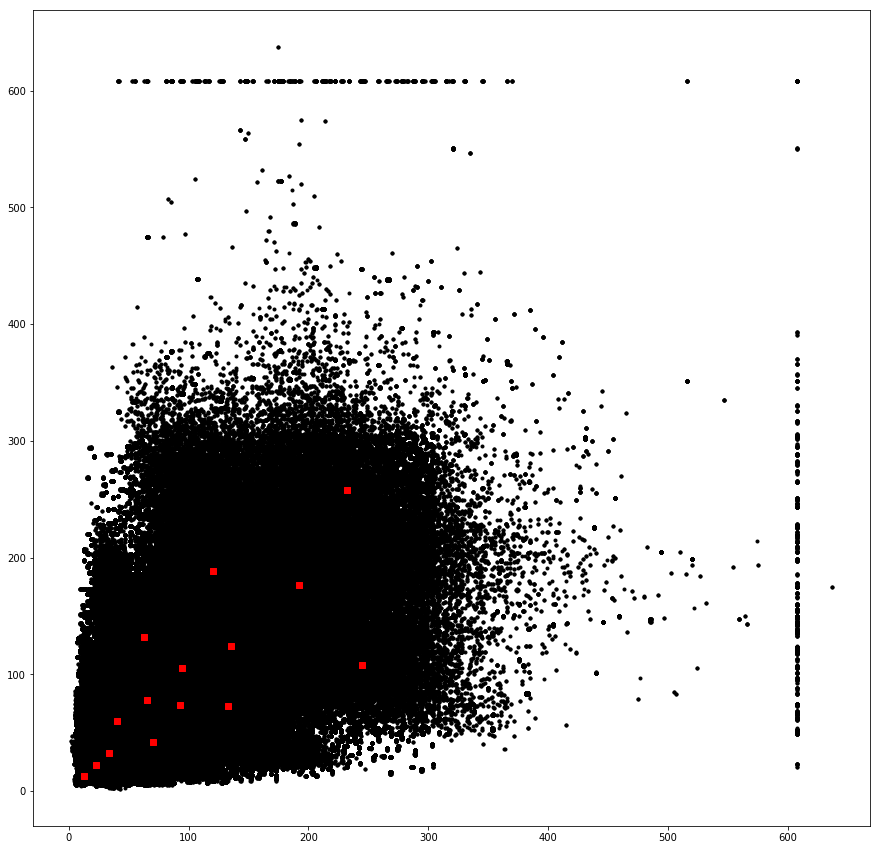

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))
ax.scatter(x, y, marker='.', color='black')

# centers = 
cx = [center[0] for center in centers]
cy = [center[1] for center in centers]
ax.scatter(cx, cy, marker='s', color='red')
"""
#1class: 12,12,  28,29,  40,65,  62,43,  77,84,  108,63,  78,129,  113,103,  197,89,  142,145,  127,227,  220,183,  277,285,  573,255,  337,595
#11 classes: 12,12,  28,28,  65,40,  43,63,  84,77,  67,110,  129,76,  106,112,  93,192,  148,140,  232,122,  185,217,  284,277,  264,577,  587,314
"""

plt.show()

#### sizes_new, kmeans 15

In [ ]:
# get the number of boxes that is bigger > 600
w_large = [size for size in sizes if size[0] > 600]
h_large = [size for size in sizes if size[1] > 600]
print("  ", "total", len(sizes), "w_large", len(w_large), "h_large", len(h_large))

In [ ]:
# remove abnormal boxes
sizes_new = [size for size in sizes if size[0] < 600 and size[1] < 600]
print("  ", "sizes_new total", len(sizes_new))


In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))
ax.scatter(x, y, marker='.', color='black')

# centers = 
cx = [center[0] for center in centers]
cy = [center[1] for center in centers]
ax.scatter(cx, cy, marker='s', color='red')
"""
12,12,  27,28,  55,35,  38,58,  76,65,  62,96,  124,63,  97,94,  91,137,  133,113,  231,111,  160,163,  114,230,  222,233,  346,298
"""

plt.show()

#### sizes, cv2.kmeans2 15

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))
ax.scatter(x, y, marker='.', color='black')

# centers = 
cx = [center[0] for center in centers]
cy = [center[1] for center in centers]
ax.scatter(cx, cy, marker='s', color='red')
"""
13,13,  29,34,  49,27,  69,50,  54,77,  101,75,  85,108,  192,75,  127,119,  112,193,  193,162,  244,258,  535,247,  248,583,  556,560
"""

plt.show()

#### sizes_new, cv2.kmeans2 15

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))
ax.scatter(x, y, marker='.', color='black')

# centers = 
cx = [center[0] for center in centers]
cy = [center[1] for center in centers]
ax.scatter(cx, cy, marker='s', color='red')
"""
12,12,  26,27,  48,29,  26,59,  48,53,  80,63,  59,94,  129,61,  94,100,  130,114,  96,173,  229,113,  171,175,  194,291,  308,246
"""

plt.show()

### kmeans

In [5]:
def kmeans_cluster(features, K, batch_size):
    X = np.asarray(features)
#     ss = StandardScaler()
#     X = ss.fit_transform(X)
    estimator = MiniBatchKMeans(n_clusters=K, random_state=1, batch_size=batch_size, compute_labels=True)
    estimator.fit(X)
    cluster_centers_ = estimator.cluster_centers_
    return cluster_centers_

In [6]:
cluster_centers_ = kmeans_cluster(sizes, K=15, batch_size=128)

In [7]:
# X = np.array(sizes)
# kmeans = KMeans(n_clusters=15, random_state=1).fit(X)
# cluster_centers_ = kmeans.cluster_centers_

In [8]:
centers = []
for center in cluster_centers_:
    print("du", center)
    centers.append(center)
print(centers)

du [12.81040822 12.81795041]
du [135.48353414 124.30401606]
du [65.19236641 77.97797165]
du [232.26588235 257.56941176]
du [ 94.20633442 105.18840242]
du [22.51840349 22.52560629]
du [192.47317597 176.16845494]
du [244.60336538 108.23557692]
du [ 62.61115475 131.97250589]
du [92.90316623 73.89472296]
du [39.99013921 60.11803944]
du [120.67419635 188.22589053]
du [70.3549267  42.14047051]
du [33.53031618 32.29572226]
du [133.01218027  73.11936663]
[array([12.81040822, 12.81795041]), array([135.48353414, 124.30401606]), array([65.19236641, 77.97797165]), array([232.26588235, 257.56941176]), array([ 94.20633442, 105.18840242]), array([22.51840349, 22.52560629]), array([192.47317597, 176.16845494]), array([244.60336538, 108.23557692]), array([ 62.61115475, 131.97250589]), array([92.90316623, 73.89472296]), array([39.99013921, 60.11803944]), array([120.67419635, 188.22589053]), array([70.3549267 , 42.14047051]), array([33.53031618, 32.29572226]), array([133.01218027,  73.11936663])]


In [9]:
tosort = {int(center[0]*center[1]):center for center in centers}
print(tosort)

{5083: array([65.19236641, 77.97797165]), 164: array([12.81040822, 12.81795041]), 8262: array([ 62.61115475, 131.97250589]), 16841: array([135.48353414, 124.30401606]), 26474: array([244.60336538, 108.23557692]), 9725: array([133.01218027,  73.11936663]), 59824: array([232.26588235, 257.56941176]), 6865: array([92.90316623, 73.89472296]), 33907: array([192.47317597, 176.16845494]), 2964: array([70.3549267 , 42.14047051]), 9909: array([ 94.20633442, 105.18840242]), 2404: array([39.99013921, 60.11803944]), 22714: array([120.67419635, 188.22589053]), 507: array([22.51840349, 22.52560629]), 1082: array([33.53031618, 32.29572226])}


In [10]:
hassorted = sorted(tosort.items())
print(hassorted)
print("  " + ",  ".join(["{},{}".format(int(value[1][0]),int(value[1][1])) for value in hassorted]))

[(164, array([12.81040822, 12.81795041])), (507, array([22.51840349, 22.52560629])), (1082, array([33.53031618, 32.29572226])), (2404, array([39.99013921, 60.11803944])), (2964, array([70.3549267 , 42.14047051])), (5083, array([65.19236641, 77.97797165])), (6865, array([92.90316623, 73.89472296])), (8262, array([ 62.61115475, 131.97250589])), (9725, array([133.01218027,  73.11936663])), (9909, array([ 94.20633442, 105.18840242])), (16841, array([135.48353414, 124.30401606])), (22714, array([120.67419635, 188.22589053])), (26474, array([244.60336538, 108.23557692])), (33907, array([192.47317597, 176.16845494])), (59824, array([232.26588235, 257.56941176]))]
  12,12,  22,22,  33,32,  39,60,  70,42,  65,77,  92,73,  62,131,  133,73,  94,105,  135,124,  120,188,  244,108,  192,176,  232,257


### cv2.kmeans2

In [ ]:
import cv2

In [ ]:
X = np.array(sizes_new, dtype=np.float32)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS
compactness, label, centers = cv2.kmeans(X, 15, None, criteria, 10, flags)

In [ ]:
print(centers)
tosort = {int(center[0]*center[1]):center for center in centers}
print(tosort)
hassorted = sorted(tosort.items())
print(hassorted)
print("  " + ",  ".join(["{},{}".format(int(value[1][0]),int(value[1][1])) for value in hassorted]))